# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpm8uk3cn7


[d3graph] INFO> Writing /local/scratch/tmp/tmpm8uk3cn7/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']

  0%|          | 0/27 [00:00<?, ?it/s]

  4%|▎         | 1/27 [00:02<01:12,  2.79s/it]

  7%|▋         | 2/27 [00:04<00:53,  2.12s/it]

 11%|█         | 3/27 [00:05<00:36,  1.54s/it]

 15%|█▍        | 4/27 [00:06<00:28,  1.26s/it]

 19%|█▊        | 5/27 [00:06<00:24,  1.10s/it]

 22%|██▏       | 6/27 [00:07<00:21,  1.00s/it]

 26%|██▌       | 7/27 [00:08<00:18,  1.06it/s]

 30%|██▉       | 8/27 [00:09<00:17,  1.10it/s]

 33%|███▎      | 9/27 [00:10<00:15,  1.13it/s]

 37%|███▋      | 10/27 [00:11<00:14,  1.15it/s]

 41%|████      | 11/27 [00:11<00:13,  1.16it/s]

 44%|████▍     | 12/27 [00:12<00:12,  1.18it/s]

 48%|████▊     | 13/27 [00:13<00:11,  1.18it/s]

 52%|█████▏    | 14/27 [00:14<00:10,  1.19it/s]

 56%|█████▌    | 15/27 [00:15<00:10,  1.19it/s]

 59%|█████▉    | 16/27 [00:16<00:09,  1.11it/s]

 63%|██████▎   | 17/27 [00:17<00:08,  1.12it/s]

 67%|██████▋   | 18/27 [00:17<00:07,  1.15it/s]

 70%|███████   | 19/27 [00:18<00:06,  1.17it/s]

 74%|███████▍  | 20/27 [00:19<00:05,  1.19it/s]

 78%|███████▊  | 21/27 [00:20<00:05,  1.19it/s]

 81%|████████▏ | 22/27 [00:21<00:04,  1.20it/s]

 85%|████████▌ | 23/27 [00:22<00:03,  1.20it/s]

 89%|████████▉ | 24/27 [00:22<00:02,  1.20it/s]

 93%|█████████▎| 25/27 [00:23<00:01,  1.20it/s]

 96%|█████████▋| 26/27 [00:24<00:00,  1.20it/s]

100%|██████████| 27/27 [00:25<00:00,  1.29it/s]

100%|██████████| 27/27 [00:25<00:00,  1.06it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


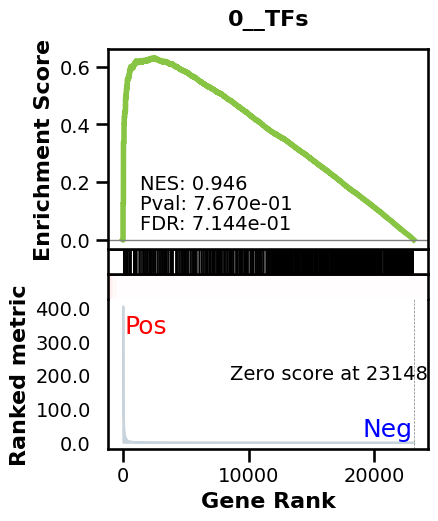

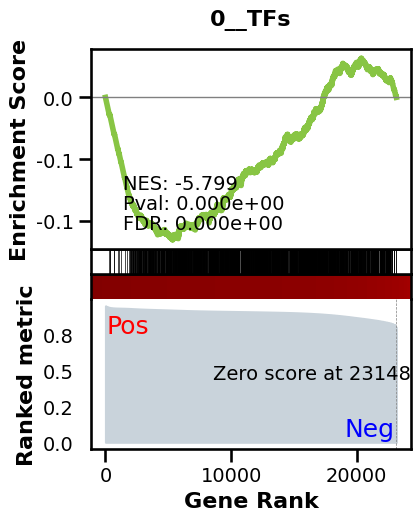

_________________________________________
TF specific enrichment


found some significant results for  64.28571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:30,  4.23it/s]

  2%|▏         | 2/128 [00:00<00:29,  4.27it/s]

  2%|▏         | 3/128 [00:00<00:29,  4.25it/s]

  3%|▎         | 4/128 [00:00<00:29,  4.27it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.28it/s]

  5%|▍         | 6/128 [00:01<00:28,  4.29it/s]

  5%|▌         | 7/128 [00:01<00:28,  4.30it/s]

  6%|▋         | 8/128 [00:01<00:27,  4.30it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.30it/s]

  8%|▊         | 10/128 [00:02<00:27,  4.30it/s]

  9%|▊         | 11/128 [00:02<00:27,  4.30it/s]

  9%|▉         | 12/128 [00:02<00:27,  4.29it/s]

 10%|█         | 13/128 [00:03<00:26,  4.30it/s]

 11%|█         | 14/128 [00:03<00:26,  4.30it/s]

 12%|█▏        | 15/128 [00:03<00:26,  4.30it/s]

 12%|█▎        | 16/128 [00:03<00:26,  4.29it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.30it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.30it/s]

 15%|█▍        | 19/128 [00:04<00:25,  4.29it/s]

 16%|█▌        | 20/128 [00:04<00:25,  4.29it/s]

 16%|█▋        | 21/128 [00:04<00:24,  4.28it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.29it/s]

 18%|█▊        | 23/128 [00:05<00:24,  4.27it/s]

 19%|█▉        | 24/128 [00:05<00:24,  4.28it/s]

 20%|█▉        | 25/128 [00:05<00:24,  4.26it/s]

 20%|██        | 26/128 [00:06<00:23,  4.28it/s]

 21%|██        | 27/128 [00:06<00:23,  4.27it/s]

 22%|██▏       | 28/128 [00:06<00:23,  4.28it/s]

 23%|██▎       | 29/128 [00:06<00:23,  4.29it/s]

 23%|██▎       | 30/128 [00:06<00:22,  4.29it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.30it/s]

 25%|██▌       | 32/128 [00:07<00:22,  4.29it/s]

 26%|██▌       | 33/128 [00:07<00:22,  4.29it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.28it/s]

 27%|██▋       | 35/128 [00:08<00:21,  4.28it/s]

 28%|██▊       | 36/128 [00:08<00:21,  4.28it/s]

 29%|██▉       | 37/128 [00:08<00:21,  4.28it/s]

 30%|██▉       | 38/128 [00:08<00:21,  4.28it/s]

 30%|███       | 39/128 [00:09<00:20,  4.28it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.28it/s]

 32%|███▏      | 41/128 [00:09<00:20,  4.28it/s]

 33%|███▎      | 42/128 [00:09<00:20,  4.29it/s]

 34%|███▎      | 43/128 [00:10<00:19,  4.29it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.30it/s]

 35%|███▌      | 45/128 [00:10<00:19,  4.27it/s]

 36%|███▌      | 46/128 [00:10<00:19,  4.27it/s]

 37%|███▋      | 47/128 [00:10<00:19,  4.23it/s]

 38%|███▊      | 48/128 [00:11<00:19,  4.15it/s]

 38%|███▊      | 49/128 [00:11<00:18,  4.18it/s]

 39%|███▉      | 50/128 [00:11<00:18,  4.21it/s]

 40%|███▉      | 51/128 [00:11<00:18,  4.22it/s]

 41%|████      | 52/128 [00:12<00:17,  4.24it/s]

 41%|████▏     | 53/128 [00:12<00:17,  4.26it/s]

 42%|████▏     | 54/128 [00:12<00:17,  4.27it/s]

 43%|████▎     | 55/128 [00:12<00:17,  4.27it/s]

 44%|████▍     | 56/128 [00:13<00:17,  4.22it/s]

 45%|████▍     | 57/128 [00:13<00:17,  4.01it/s]

 45%|████▌     | 58/128 [00:13<00:17,  4.10it/s]

 46%|████▌     | 59/128 [00:13<00:16,  4.16it/s]

 47%|████▋     | 60/128 [00:14<00:16,  4.21it/s]

 48%|████▊     | 61/128 [00:14<00:15,  4.24it/s]

 48%|████▊     | 62/128 [00:14<00:15,  4.26it/s]

 49%|████▉     | 63/128 [00:14<00:15,  4.28it/s]

 50%|█████     | 64/128 [00:15<00:14,  4.27it/s]

 51%|█████     | 65/128 [00:15<00:14,  4.28it/s]

 52%|█████▏    | 66/128 [00:15<00:15,  4.07it/s]

 52%|█████▏    | 67/128 [00:15<00:14,  4.14it/s]

 53%|█████▎    | 68/128 [00:15<00:14,  4.19it/s]

 54%|█████▍    | 69/128 [00:16<00:14,  4.20it/s]

 55%|█████▍    | 70/128 [00:16<00:13,  4.24it/s]

 55%|█████▌    | 71/128 [00:16<00:13,  4.24it/s]

 56%|█████▋    | 72/128 [00:16<00:13,  4.26it/s]

 57%|█████▋    | 73/128 [00:17<00:12,  4.26it/s]

 58%|█████▊    | 74/128 [00:17<00:12,  4.27it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.28it/s]

 59%|█████▉    | 76/128 [00:17<00:12,  4.29it/s]

 60%|██████    | 77/128 [00:18<00:11,  4.29it/s]

 61%|██████    | 78/128 [00:18<00:11,  4.30it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.30it/s]

 62%|██████▎   | 80/128 [00:18<00:11,  4.30it/s]

 63%|██████▎   | 81/128 [00:19<00:10,  4.31it/s]

 64%|██████▍   | 82/128 [00:19<00:10,  4.31it/s]

 65%|██████▍   | 83/128 [00:19<00:10,  4.31it/s]

 66%|██████▌   | 84/128 [00:19<00:10,  4.31it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.31it/s]

 67%|██████▋   | 86/128 [00:20<00:09,  4.30it/s]

 68%|██████▊   | 87/128 [00:20<00:09,  4.31it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.29it/s]

 70%|██████▉   | 89/128 [00:20<00:09,  4.30it/s]

 70%|███████   | 90/128 [00:21<00:08,  4.31it/s]

 71%|███████   | 91/128 [00:21<00:08,  4.29it/s]

 72%|███████▏  | 92/128 [00:21<00:08,  4.30it/s]

 73%|███████▎  | 93/128 [00:21<00:08,  4.28it/s]

 73%|███████▎  | 94/128 [00:22<00:07,  4.29it/s]

 74%|███████▍  | 95/128 [00:22<00:07,  4.30it/s]

 75%|███████▌  | 96/128 [00:22<00:07,  4.30it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.31it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.31it/s]

 77%|███████▋  | 99/128 [00:23<00:06,  4.30it/s]

 78%|███████▊  | 100/128 [00:23<00:06,  4.31it/s]

 79%|███████▉  | 101/128 [00:23<00:06,  4.31it/s]

 80%|███████▉  | 102/128 [00:23<00:06,  4.31it/s]

 80%|████████  | 103/128 [00:24<00:05,  4.31it/s]

 81%|████████▏ | 104/128 [00:24<00:05,  4.31it/s]

 82%|████████▏ | 105/128 [00:24<00:05,  4.31it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.32it/s]

 84%|████████▎ | 107/128 [00:25<00:04,  4.32it/s]

 84%|████████▍ | 108/128 [00:25<00:04,  4.32it/s]

 85%|████████▌ | 109/128 [00:25<00:04,  4.32it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.31it/s]

 87%|████████▋ | 111/128 [00:25<00:03,  4.31it/s]

 88%|████████▊ | 112/128 [00:26<00:03,  4.31it/s]

 88%|████████▊ | 113/128 [00:26<00:03,  4.30it/s]

 89%|████████▉ | 114/128 [00:26<00:03,  4.31it/s]

 90%|████████▉ | 115/128 [00:26<00:03,  4.29it/s]

 91%|█████████ | 116/128 [00:27<00:02,  4.30it/s]

 91%|█████████▏| 117/128 [00:27<00:02,  4.28it/s]

 92%|█████████▏| 118/128 [00:27<00:02,  4.29it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.29it/s]

 94%|█████████▍| 120/128 [00:28<00:01,  4.29it/s]

 95%|█████████▍| 121/128 [00:28<00:01,  4.30it/s]

 95%|█████████▌| 122/128 [00:28<00:01,  4.31it/s]

 96%|█████████▌| 123/128 [00:28<00:01,  4.31it/s]

 97%|█████████▋| 124/128 [00:29<00:00,  4.30it/s]

 98%|█████████▊| 125/128 [00:29<00:00,  4.31it/s]

 98%|█████████▊| 126/128 [00:29<00:00,  4.31it/s]

 99%|█████████▉| 127/128 [00:29<00:00,  4.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:29<00:00,  4.28it/s]

100%|██████████| 128/128 [00:29<00:00,  4.28it/s]

Average Precision (AP):  0.0010102562555374605
Area Under Precision-Recall Curve (AUPRC):  0.0010096025812294132


EPR: 1.818835128617717


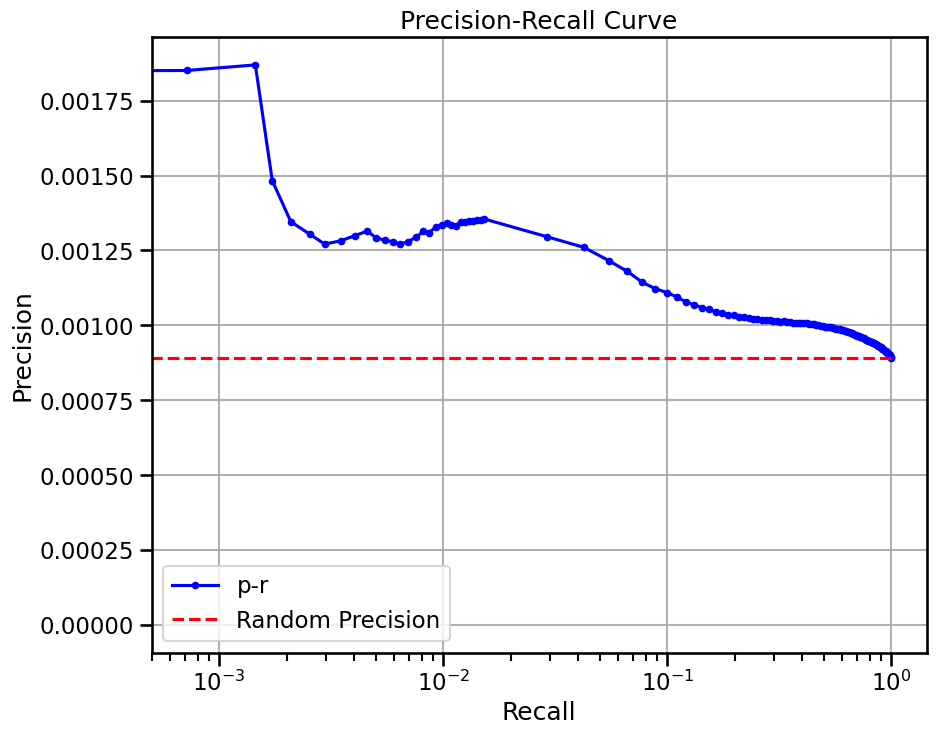

  0%|          | 0/54 [00:00<?, ?it/s]

  2%|▏         | 1/54 [00:02<02:16,  2.57s/it]

  4%|▎         | 2/54 [00:04<01:39,  1.91s/it]

  6%|▌         | 3/54 [00:05<01:25,  1.69s/it]

  7%|▋         | 4/54 [00:07<01:24,  1.70s/it]

  9%|▉         | 5/54 [00:08<01:16,  1.56s/it]

 11%|█         | 6/54 [00:09<01:11,  1.49s/it]

 13%|█▎        | 7/54 [00:11<01:09,  1.48s/it]

 15%|█▍        | 8/54 [00:12<01:09,  1.50s/it]

 17%|█▋        | 9/54 [00:14<01:05,  1.46s/it]

 19%|█▊        | 10/54 [00:15<01:04,  1.45s/it]

 20%|██        | 11/54 [00:17<01:02,  1.46s/it]

 22%|██▏       | 12/54 [00:18<01:01,  1.47s/it]

 24%|██▍       | 13/54 [00:20<01:01,  1.51s/it]

 26%|██▌       | 14/54 [00:21<00:59,  1.49s/it]

 28%|██▊       | 15/54 [00:23<00:57,  1.47s/it]

 30%|██▉       | 16/54 [00:24<00:58,  1.53s/it]

 31%|███▏      | 17/54 [00:26<00:54,  1.48s/it]

 33%|███▎      | 18/54 [00:27<00:53,  1.49s/it]

 35%|███▌      | 19/54 [00:29<00:52,  1.51s/it]

 37%|███▋      | 20/54 [00:30<00:50,  1.48s/it]

 39%|███▉      | 21/54 [00:31<00:47,  1.43s/it]

 41%|████      | 22/54 [00:34<00:53,  1.66s/it]

 43%|████▎     | 23/54 [00:35<00:47,  1.52s/it]

 44%|████▍     | 24/54 [00:36<00:42,  1.42s/it]

 46%|████▋     | 25/54 [00:37<00:38,  1.34s/it]

 48%|████▊     | 26/54 [00:38<00:36,  1.29s/it]

 50%|█████     | 27/54 [00:40<00:37,  1.38s/it]

 52%|█████▏    | 28/54 [00:41<00:36,  1.40s/it]

 54%|█████▎    | 29/54 [00:43<00:33,  1.33s/it]

 56%|█████▌    | 30/54 [00:44<00:31,  1.32s/it]

 57%|█████▋    | 31/54 [00:45<00:29,  1.28s/it]

 59%|█████▉    | 32/54 [00:47<00:30,  1.37s/it]

 61%|██████    | 33/54 [00:48<00:27,  1.32s/it]

 63%|██████▎   | 34/54 [00:49<00:25,  1.27s/it]

 65%|██████▍   | 35/54 [00:50<00:23,  1.25s/it]

 67%|██████▋   | 36/54 [00:52<00:23,  1.31s/it]

 69%|██████▊   | 37/54 [00:53<00:21,  1.27s/it]

 70%|███████   | 38/54 [00:54<00:19,  1.25s/it]

 72%|███████▏  | 39/54 [00:55<00:18,  1.23s/it]

 74%|███████▍  | 40/54 [00:56<00:17,  1.24s/it]

 76%|███████▌  | 41/54 [00:58<00:15,  1.22s/it]

 78%|███████▊  | 42/54 [00:59<00:14,  1.23s/it]

 80%|███████▉  | 43/54 [01:00<00:13,  1.22s/it]

 81%|████████▏ | 44/54 [01:01<00:12,  1.21s/it]

 83%|████████▎ | 45/54 [01:03<00:12,  1.43s/it]

 85%|████████▌ | 46/54 [01:05<00:13,  1.70s/it]

 87%|████████▋ | 47/54 [01:07<00:10,  1.55s/it]

 89%|████████▉ | 48/54 [01:08<00:09,  1.51s/it]

 91%|█████████ | 49/54 [01:10<00:07,  1.51s/it]

 93%|█████████▎| 50/54 [01:11<00:06,  1.50s/it]

 94%|█████████▍| 51/54 [01:13<00:04,  1.52s/it]

 96%|█████████▋| 52/54 [01:14<00:02,  1.42s/it]

 98%|█████████▊| 53/54 [01:15<00:01,  1.35s/it]

100%|██████████| 54/54 [01:16<00:00,  1.13s/it]

100%|██████████| 54/54 [01:16<00:00,  1.41s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


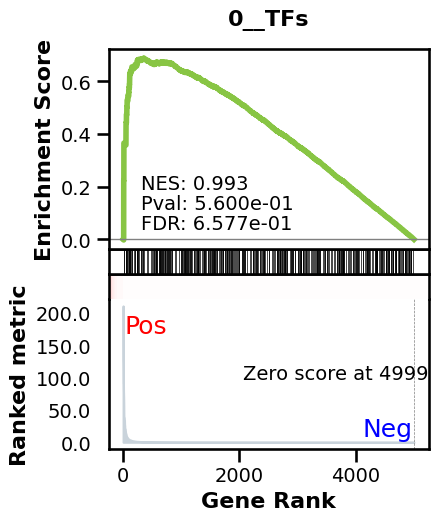

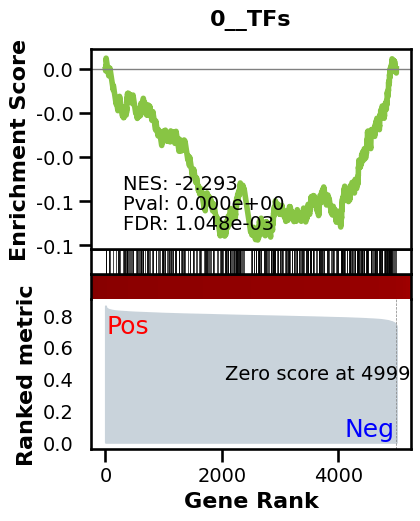

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.79it/s]

 10%|█         | 13/128 [00:00<00:01, 60.03it/s]

 16%|█▌        | 20/128 [00:00<00:01, 60.06it/s]

 21%|██        | 27/128 [00:00<00:01, 60.00it/s]

 26%|██▌       | 33/128 [00:00<00:01, 59.93it/s]

 30%|███       | 39/128 [00:00<00:01, 59.94it/s]

 35%|███▌      | 45/128 [00:00<00:01, 59.94it/s]

 41%|████      | 52/128 [00:00<00:01, 59.98it/s]

 45%|████▌     | 58/128 [00:00<00:01, 59.95it/s]

 50%|█████     | 64/128 [00:01<00:01, 59.91it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 59.92it/s]

 60%|██████    | 77/128 [00:01<00:00, 59.97it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 59.97it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 59.96it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 59.93it/s]

 79%|███████▉  | 101/128 [00:01<00:00, 59.90it/s]

 84%|████████▎ | 107/128 [00:01<00:00, 59.88it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 59.96it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 59.90it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 59.91it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.88it/s]

Average Precision (AP):  0.0008785194847128491
Area Under Precision-Recall Curve (AUPRC):  0.000876341582078115
EPR: 2.6620469453287052


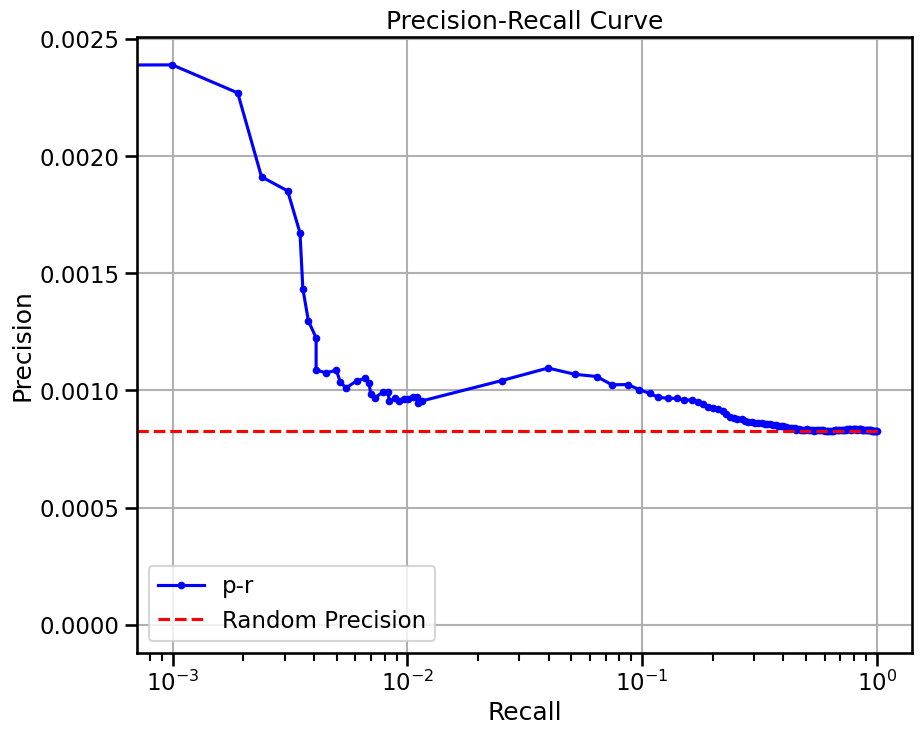

base enrichment


Top central genes: []


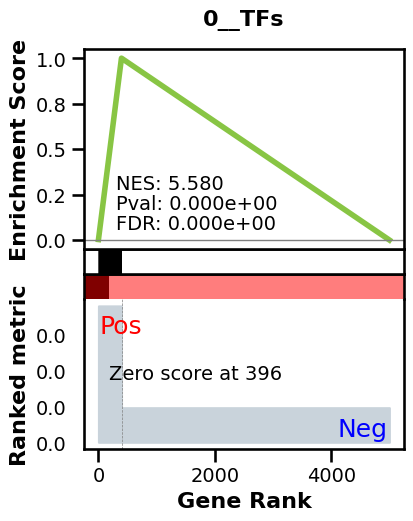

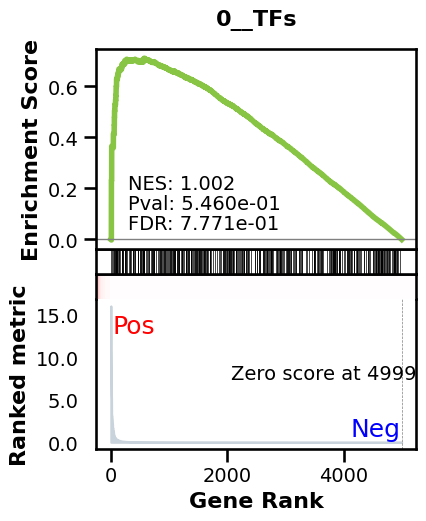

_________________________________________
TF specific enrichment


found some significant results for  17.647058823529413 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.27it/s]

 11%|█         | 14/128 [00:00<00:01, 60.33it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.31it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.27it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.22it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.19it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.24it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.27it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.29it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.25it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.27it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.32it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.30it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.27it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.22it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.23it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.19it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.18it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.20it/s]

Average Precision (AP):  0.0019620161447192167
Area Under Precision-Recall Curve (AUPRC):  0.0016630239581753494
EPR: 4.246105316851987


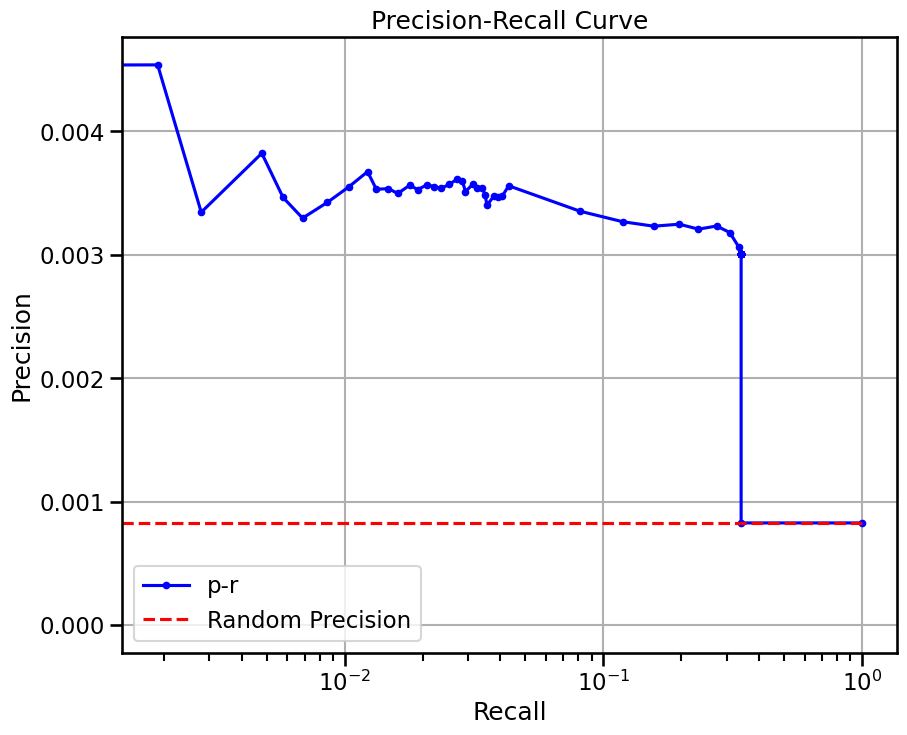

true elem 10028 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


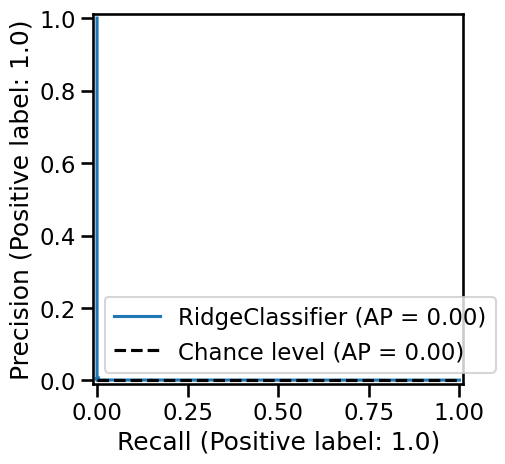

base enrichment


Top central genes: []
The DataFrame contains only the same values.


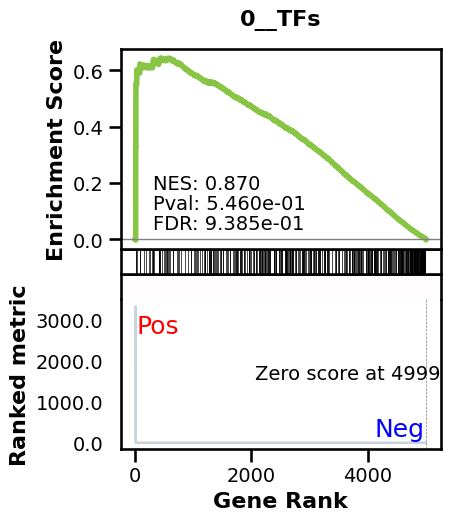

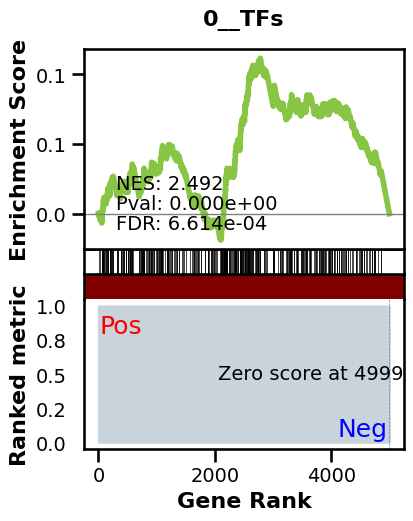

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.89it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.82it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.84it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.86it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.90it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.89it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.86it/s]

 38%|███▊      | 49/128 [00:00<00:01, 59.94it/s]

 43%|████▎     | 55/128 [00:00<00:01, 59.94it/s]

 48%|████▊     | 61/128 [00:01<00:01, 59.75it/s]

 52%|█████▏    | 67/128 [00:01<00:01, 59.66it/s]

 57%|█████▋    | 73/128 [00:01<00:00, 59.65it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 59.67it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 59.70it/s]

 71%|███████   | 91/128 [00:01<00:00, 59.72it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 59.71it/s]

 80%|████████  | 103/128 [00:01<00:00, 59.73it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 59.70it/s]

 90%|████████▉ | 115/128 [00:01<00:00, 59.56it/s]

 95%|█████████▍| 121/128 [00:02<00:00, 59.59it/s]

 99%|█████████▉| 127/128 [00:02<00:00, 59.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.70it/s]

Average Precision (AP):  0.001001631669014589
Area Under Precision-Recall Curve (AUPRC):  0.0009939949376875782
EPR: 4.979989927628857


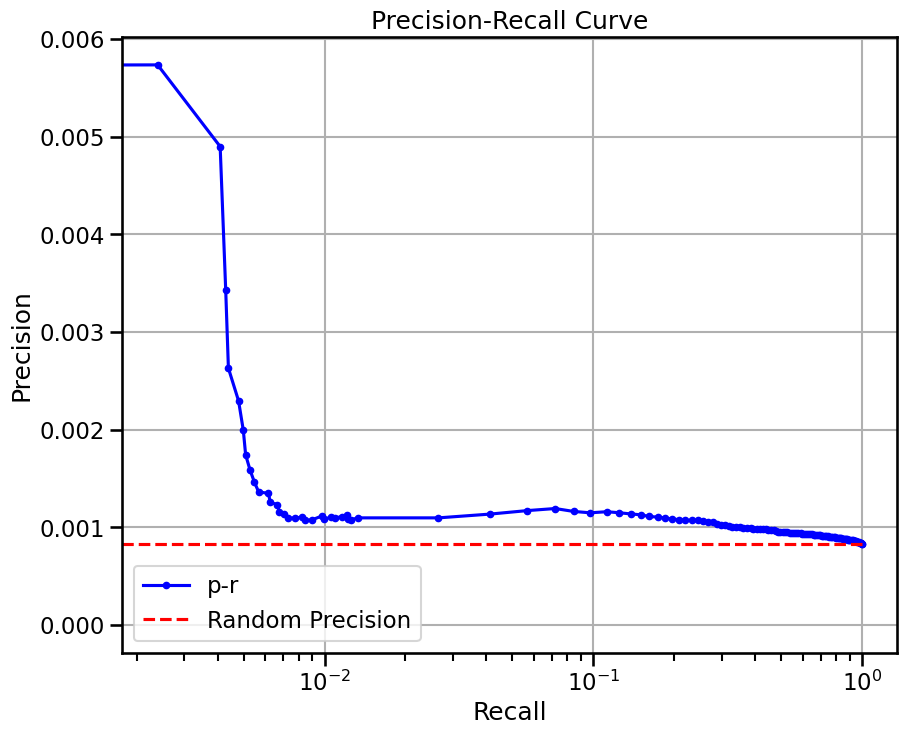

base enrichment


Top central genes: []


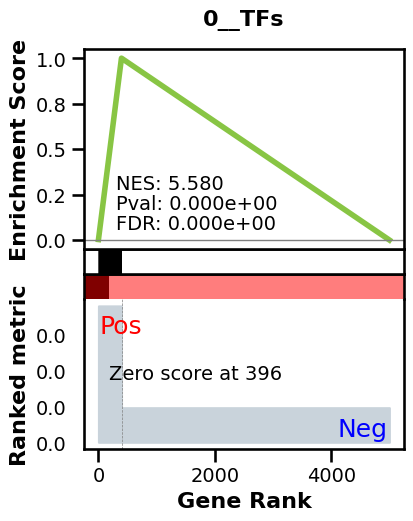

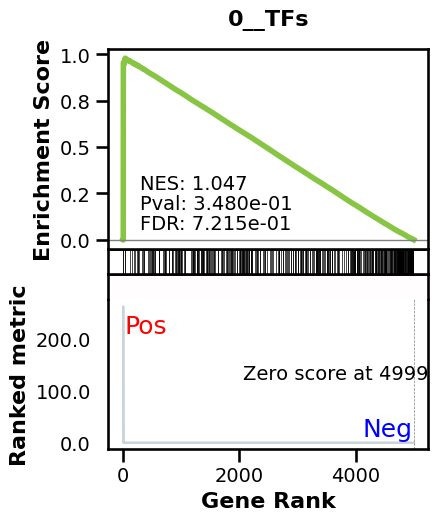

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.93it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.83it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.74it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.74it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.74it/s]

 28%|██▊       | 36/128 [00:00<00:01, 58.73it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.74it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.77it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.75it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.73it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 58.66it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 58.68it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.71it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.75it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.77it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 58.79it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 58.76it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 58.70it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.76it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.82it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.83it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.73it/s]

Average Precision (AP):  0.0025784741889535168
Area Under Precision-Recall Curve (AUPRC):  0.002226923771398881
EPR: 12.416585640502555


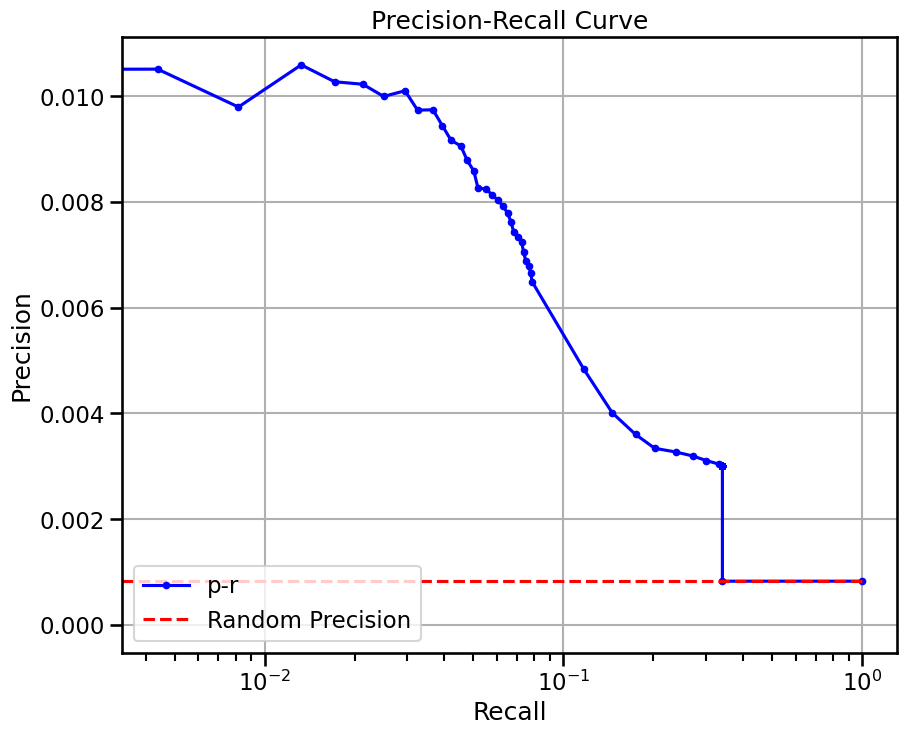

  0%|          | 0/9 [00:00<?, ?it/s]

 11%|█         | 1/9 [00:01<00:15,  1.90s/it]

 22%|██▏       | 2/9 [00:02<00:09,  1.30s/it]

 33%|███▎      | 3/9 [00:03<00:07,  1.24s/it]

 44%|████▍     | 4/9 [00:04<00:05,  1.13s/it]

 56%|█████▌    | 5/9 [00:06<00:05,  1.28s/it]

 67%|██████▋   | 6/9 [00:07<00:03,  1.19s/it]

 78%|███████▊  | 7/9 [00:08<00:02,  1.07s/it]

 89%|████████▉ | 8/9 [00:09<00:00,  1.01it/s]

100%|██████████| 9/9 [00:09<00:00,  1.39it/s]

100%|██████████| 9/9 [00:09<00:00,  1.05s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


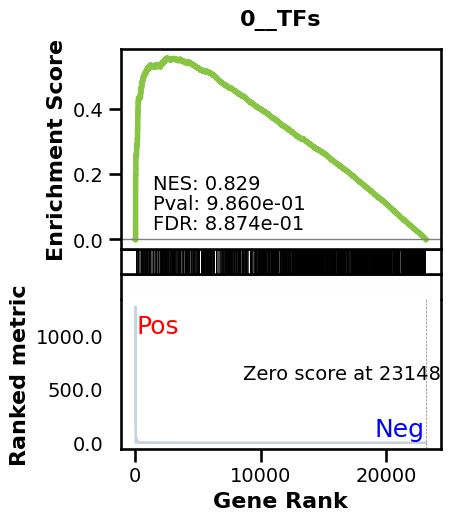

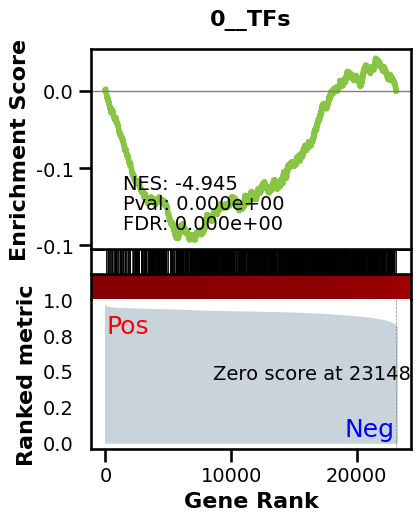

_________________________________________
TF specific enrichment


found some significant results for  66.07142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:28,  4.38it/s]

  2%|▏         | 2/128 [00:00<00:28,  4.38it/s]

  2%|▏         | 3/128 [00:00<00:28,  4.41it/s]

  3%|▎         | 4/128 [00:00<00:28,  4.40it/s]

  4%|▍         | 5/128 [00:01<00:27,  4.40it/s]

  5%|▍         | 6/128 [00:01<00:27,  4.41it/s]

  5%|▌         | 7/128 [00:01<00:27,  4.40it/s]

  6%|▋         | 8/128 [00:01<00:27,  4.39it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.39it/s]

  8%|▊         | 10/128 [00:02<00:26,  4.40it/s]

  9%|▊         | 11/128 [00:02<00:26,  4.40it/s]

  9%|▉         | 12/128 [00:02<00:26,  4.40it/s]

 10%|█         | 13/128 [00:02<00:26,  4.40it/s]

 11%|█         | 14/128 [00:03<00:25,  4.39it/s]

 12%|█▏        | 15/128 [00:03<00:25,  4.39it/s]

 12%|█▎        | 16/128 [00:03<00:25,  4.40it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.39it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.39it/s]

 15%|█▍        | 19/128 [00:04<00:24,  4.39it/s]

 16%|█▌        | 20/128 [00:04<00:24,  4.39it/s]

 16%|█▋        | 21/128 [00:04<00:24,  4.40it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.40it/s]

 18%|█▊        | 23/128 [00:05<00:23,  4.40it/s]

 19%|█▉        | 24/128 [00:05<00:23,  4.39it/s]

 20%|█▉        | 25/128 [00:05<00:23,  4.39it/s]

 20%|██        | 26/128 [00:05<00:23,  4.40it/s]

 21%|██        | 27/128 [00:06<00:22,  4.39it/s]

 22%|██▏       | 28/128 [00:06<00:23,  4.23it/s]

 23%|██▎       | 29/128 [00:06<00:23,  4.29it/s]

 23%|██▎       | 30/128 [00:06<00:22,  4.32it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.34it/s]

 25%|██▌       | 32/128 [00:07<00:21,  4.37it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.37it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.37it/s]

 27%|██▋       | 35/128 [00:07<00:21,  4.38it/s]

 28%|██▊       | 36/128 [00:08<00:20,  4.39it/s]

 29%|██▉       | 37/128 [00:08<00:20,  4.39it/s]

 30%|██▉       | 38/128 [00:08<00:21,  4.26it/s]

 30%|███       | 39/128 [00:08<00:20,  4.31it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.34it/s]

 32%|███▏      | 41/128 [00:09<00:20,  4.35it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.37it/s]

 34%|███▎      | 43/128 [00:09<00:19,  4.38it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.39it/s]

 35%|███▌      | 45/128 [00:10<00:18,  4.40it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.40it/s]

 37%|███▋      | 47/128 [00:10<00:18,  4.40it/s]

 38%|███▊      | 48/128 [00:10<00:18,  4.40it/s]

 38%|███▊      | 49/128 [00:11<00:17,  4.41it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.40it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.40it/s]

 41%|████      | 52/128 [00:11<00:17,  4.41it/s]

 41%|████▏     | 53/128 [00:12<00:16,  4.41it/s]

 42%|████▏     | 54/128 [00:12<00:16,  4.41it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.42it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.41it/s]

 45%|████▍     | 57/128 [00:13<00:16,  4.40it/s]

 45%|████▌     | 58/128 [00:13<00:15,  4.40it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.41it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.40it/s]

 48%|████▊     | 61/128 [00:13<00:15,  4.40it/s]

 48%|████▊     | 62/128 [00:14<00:14,  4.41it/s]

 49%|████▉     | 63/128 [00:14<00:14,  4.41it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.40it/s]

 51%|█████     | 65/128 [00:14<00:14,  4.41it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.41it/s]

 52%|█████▏    | 67/128 [00:15<00:13,  4.41it/s]

 53%|█████▎    | 68/128 [00:15<00:13,  4.41it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.41it/s]

 55%|█████▍    | 70/128 [00:15<00:13,  4.40it/s]

 55%|█████▌    | 71/128 [00:16<00:12,  4.41it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.41it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.39it/s]

 58%|█████▊    | 74/128 [00:16<00:12,  4.40it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.41it/s]

 59%|█████▉    | 76/128 [00:17<00:11,  4.40it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.40it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.41it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.40it/s]

 62%|██████▎   | 80/128 [00:18<00:10,  4.40it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.41it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.40it/s]

 65%|██████▍   | 83/128 [00:18<00:10,  4.41it/s]

 66%|██████▌   | 84/128 [00:19<00:09,  4.42it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.44it/s]

 67%|██████▋   | 86/128 [00:19<00:09,  4.45it/s]

 68%|██████▊   | 87/128 [00:19<00:09,  4.45it/s]

 69%|██████▉   | 88/128 [00:20<00:08,  4.45it/s]

 70%|██████▉   | 89/128 [00:20<00:08,  4.46it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.45it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.45it/s]

 72%|███████▏  | 92/128 [00:20<00:08,  4.45it/s]

 73%|███████▎  | 93/128 [00:21<00:07,  4.44it/s]

 73%|███████▎  | 94/128 [00:21<00:07,  4.45it/s]

 74%|███████▍  | 95/128 [00:21<00:07,  4.44it/s]

 75%|███████▌  | 96/128 [00:21<00:07,  4.44it/s]

 76%|███████▌  | 97/128 [00:22<00:06,  4.44it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.44it/s]

 77%|███████▋  | 99/128 [00:22<00:06,  4.43it/s]

 78%|███████▊  | 100/128 [00:22<00:06,  4.42it/s]

 79%|███████▉  | 101/128 [00:22<00:06,  4.42it/s]

 80%|███████▉  | 102/128 [00:23<00:05,  4.43it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.43it/s]

 81%|████████▏ | 104/128 [00:23<00:05,  4.05it/s]

 82%|████████▏ | 105/128 [00:23<00:05,  4.14it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.21it/s]

 84%|████████▎ | 107/128 [00:24<00:04,  4.28it/s]

 84%|████████▍ | 108/128 [00:24<00:04,  4.32it/s]

 85%|████████▌ | 109/128 [00:24<00:04,  4.34it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.36it/s]

 87%|████████▋ | 111/128 [00:25<00:03,  4.38it/s]

 88%|████████▊ | 112/128 [00:25<00:03,  4.39it/s]

 88%|████████▊ | 113/128 [00:25<00:03,  4.39it/s]

 89%|████████▉ | 114/128 [00:25<00:03,  4.40it/s]

 90%|████████▉ | 115/128 [00:26<00:02,  4.41it/s]

 91%|█████████ | 116/128 [00:26<00:02,  4.41it/s]

 91%|█████████▏| 117/128 [00:26<00:02,  4.42it/s]

 92%|█████████▏| 118/128 [00:26<00:02,  4.42it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.42it/s]

 94%|█████████▍| 120/128 [00:27<00:01,  4.42it/s]

 95%|█████████▍| 121/128 [00:27<00:01,  4.42it/s]

 95%|█████████▌| 122/128 [00:27<00:01,  4.41it/s]

 96%|█████████▌| 123/128 [00:28<00:01,  4.41it/s]

 97%|█████████▋| 124/128 [00:28<00:00,  4.41it/s]

 98%|█████████▊| 125/128 [00:28<00:00,  4.41it/s]

 98%|█████████▊| 126/128 [00:28<00:00,  4.40it/s]

 99%|█████████▉| 127/128 [00:28<00:00,  4.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:29<00:00,  4.40it/s]

100%|██████████| 128/128 [00:29<00:00,  4.39it/s]

Average Precision (AP):  0.0010086576036473336
Area Under Precision-Recall Curve (AUPRC):  0.001008391070850849


EPR: 1.7206607294847243


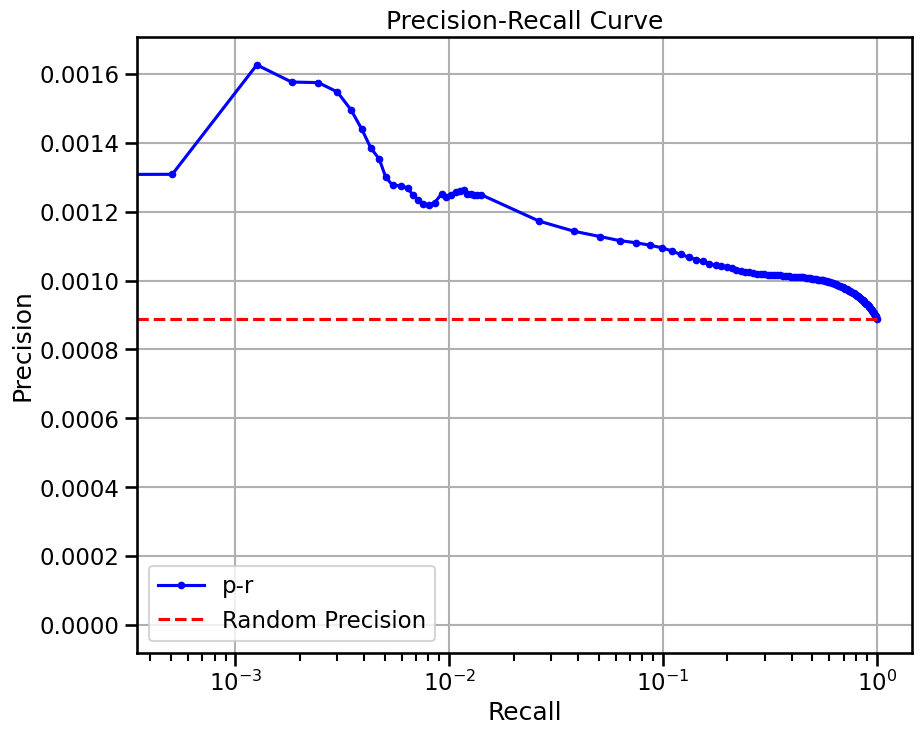

  0%|          | 0/17 [00:00<?, ?it/s]

  6%|▌         | 1/17 [00:02<00:38,  2.42s/it]

 12%|█▏        | 2/17 [00:03<00:25,  1.73s/it]

 18%|█▊        | 3/17 [00:04<00:21,  1.50s/it]

 24%|██▎       | 4/17 [00:06<00:18,  1.40s/it]

 29%|██▉       | 5/17 [00:07<00:15,  1.33s/it]

 35%|███▌      | 6/17 [00:08<00:14,  1.30s/it]

 41%|████      | 7/17 [00:09<00:12,  1.28s/it]

 47%|████▋     | 8/17 [00:11<00:11,  1.26s/it]

 53%|█████▎    | 9/17 [00:12<00:10,  1.25s/it]

 59%|█████▉    | 10/17 [00:13<00:08,  1.25s/it]

 65%|██████▍   | 11/17 [00:14<00:07,  1.25s/it]

 71%|███████   | 12/17 [00:15<00:06,  1.23s/it]

 76%|███████▋  | 13/17 [00:17<00:04,  1.20s/it]

 82%|████████▏ | 14/17 [00:18<00:03,  1.18s/it]

 88%|████████▊ | 15/17 [00:19<00:02,  1.16s/it]

 94%|█████████▍| 16/17 [00:20<00:01,  1.15s/it]

100%|██████████| 17/17 [00:20<00:00,  1.12it/s]

100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


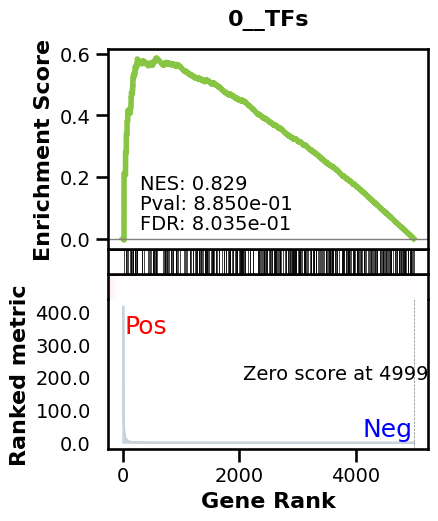

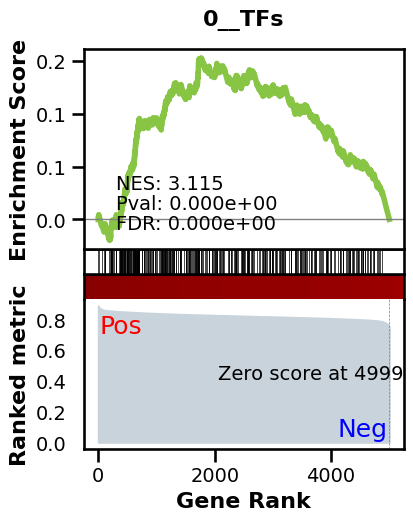

_________________________________________
TF specific enrichment


found some significant results for  11.538461538461538 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.09it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.20it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.37it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.33it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.04it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.19it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.31it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.31it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.32it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.30it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.33it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.30it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.35it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.18it/s]

 70%|███████   | 90/128 [00:01<00:00, 51.87it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.02it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.04it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.11it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.23it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.43it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.21it/s]

Average Precision (AP):  0.0008852062154727977
Area Under Precision-Recall Curve (AUPRC):  0.0008834425703391215
EPR: 1.7214852038512451


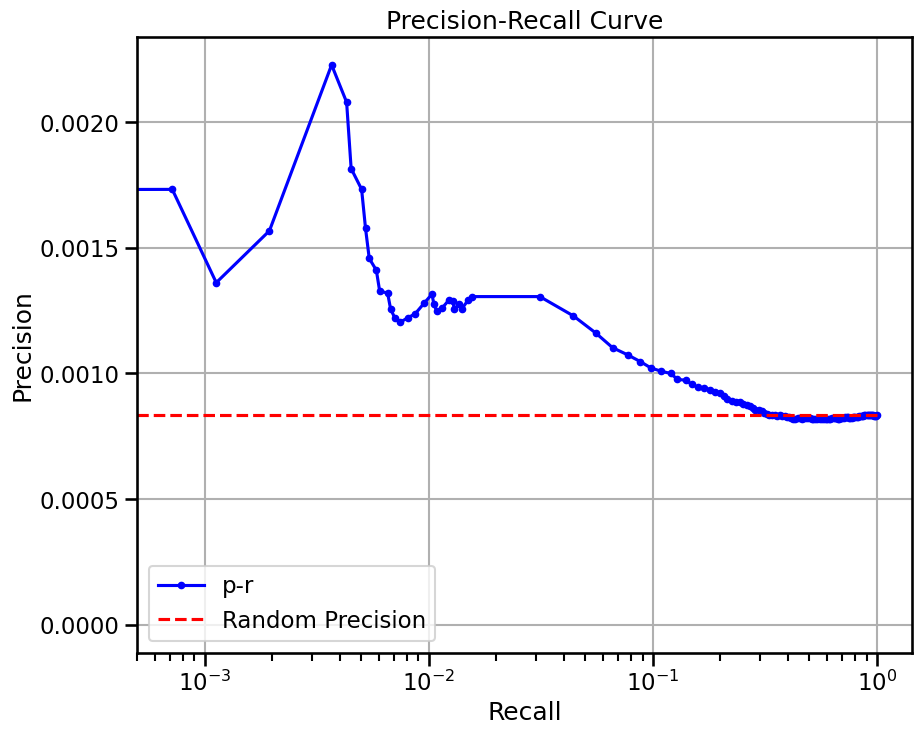

base enrichment


Top central genes: []


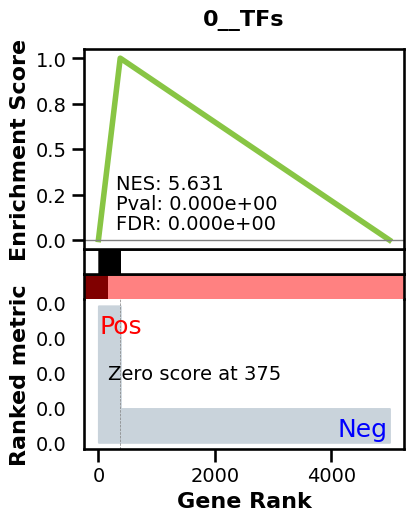

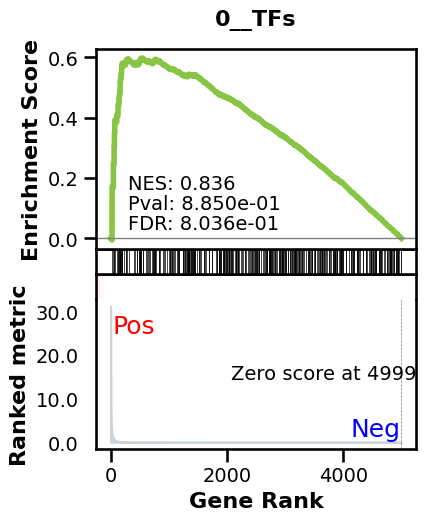

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.95it/s]

 11%|█         | 14/128 [00:00<00:01, 60.94it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.90it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.95it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.94it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.93it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.97it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.97it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.98it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.98it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.84it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.84it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.88it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.87it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.90it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.92it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.90it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.88it/s]

Average Precision (AP):  0.0029910303677130124
Area Under Precision-Recall Curve (AUPRC):  0.0026348180475252335
EPR: 10.351980256843584


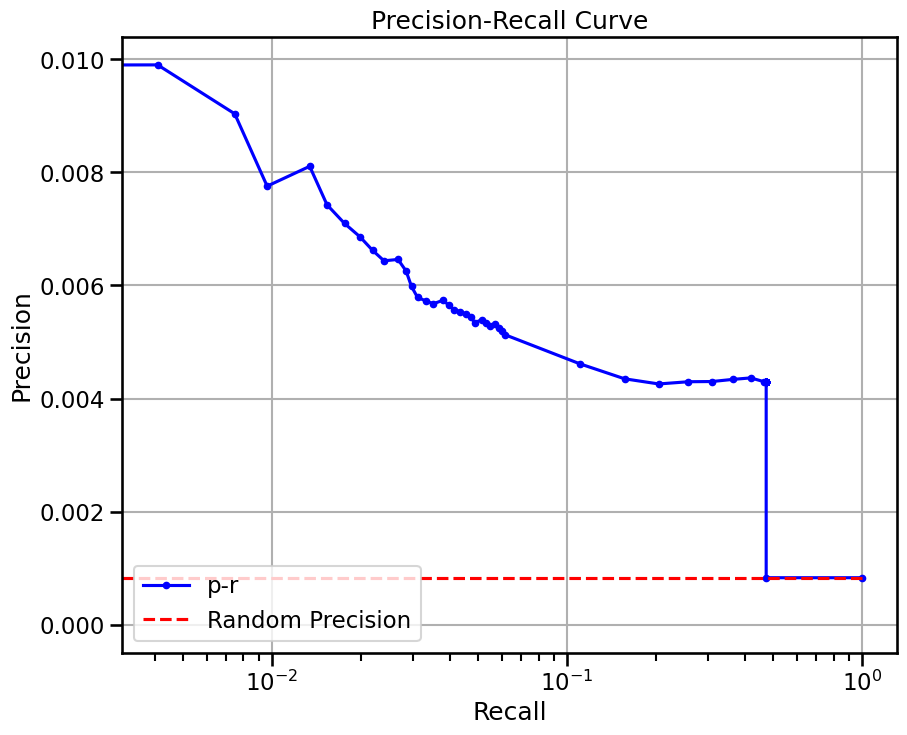

base enrichment


Top central genes: []
The DataFrame contains only the same values.


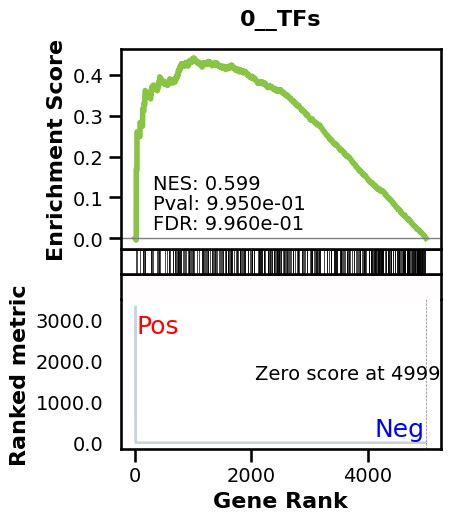

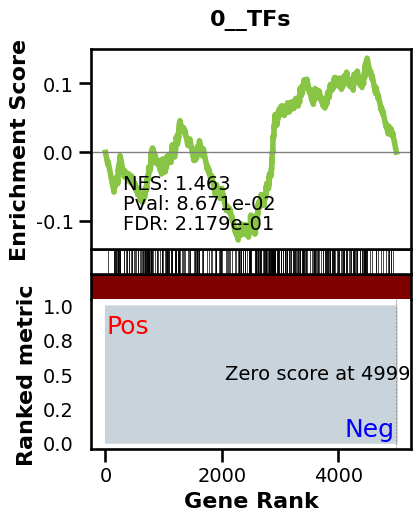

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.70it/s]

 11%|█         | 14/128 [00:00<00:01, 60.54it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.61it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.60it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.67it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.68it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.64it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.59it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.59it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.60it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.61it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.69it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.72it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.77it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.71it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.71it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.73it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.70it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.63it/s]

Average Precision (AP):  0.0009685434341484623
Area Under Precision-Recall Curve (AUPRC):  0.0009588631126320158
EPR: 5.319019774843278


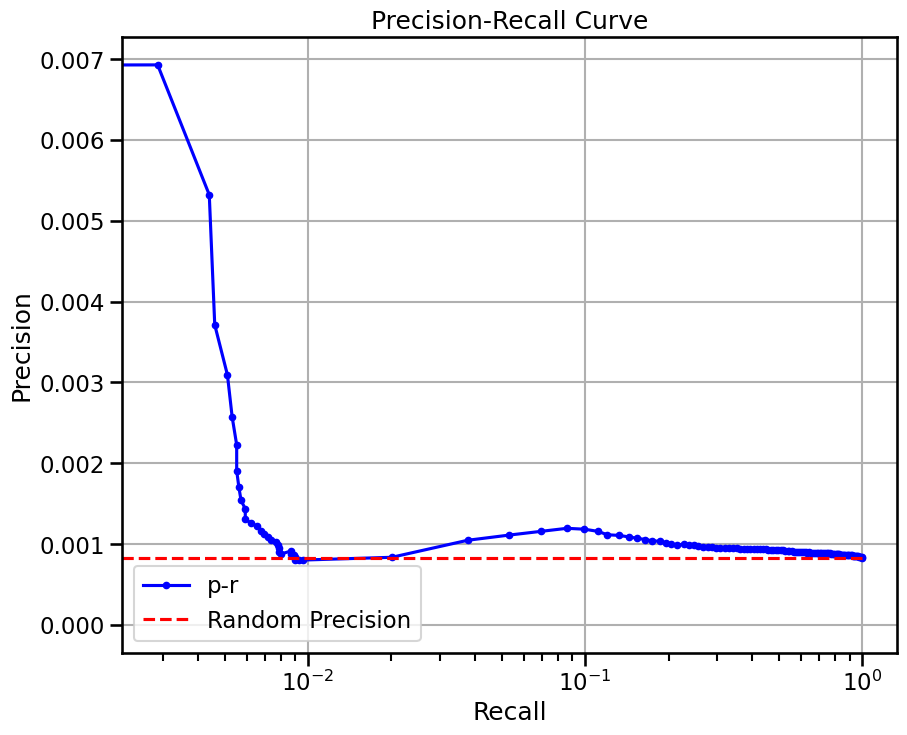

base enrichment


Top central genes: []


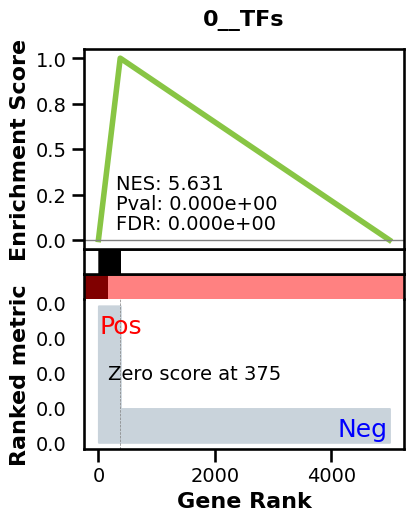

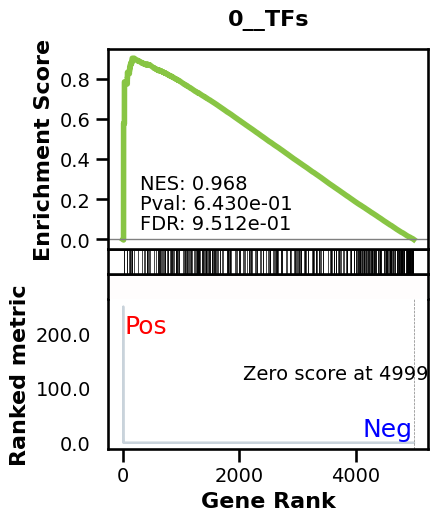

_________________________________________
TF specific enrichment


found some significant results for  3.8461538461538463 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.08it/s]

 10%|█         | 13/128 [00:00<00:01, 60.33it/s]

 16%|█▌        | 20/128 [00:00<00:01, 60.52it/s]

 21%|██        | 27/128 [00:00<00:01, 60.62it/s]

 27%|██▋       | 34/128 [00:00<00:01, 60.70it/s]

 32%|███▏      | 41/128 [00:00<00:01, 60.69it/s]

 38%|███▊      | 48/128 [00:00<00:01, 60.61it/s]

 43%|████▎     | 55/128 [00:00<00:01, 60.61it/s]

 48%|████▊     | 62/128 [00:01<00:01, 60.66it/s]

 54%|█████▍    | 69/128 [00:01<00:00, 60.69it/s]

 59%|█████▉    | 76/128 [00:01<00:00, 60.69it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 60.71it/s]

 70%|███████   | 90/128 [00:01<00:00, 60.73it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 60.75it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 60.65it/s]

 87%|████████▋ | 111/128 [00:01<00:00, 60.61it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 60.71it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 60.72it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.61it/s]

Average Precision (AP):  0.003970621029828838
Area Under Precision-Recall Curve (AUPRC):  0.003497649942138272
EPR: 18.57911694960466


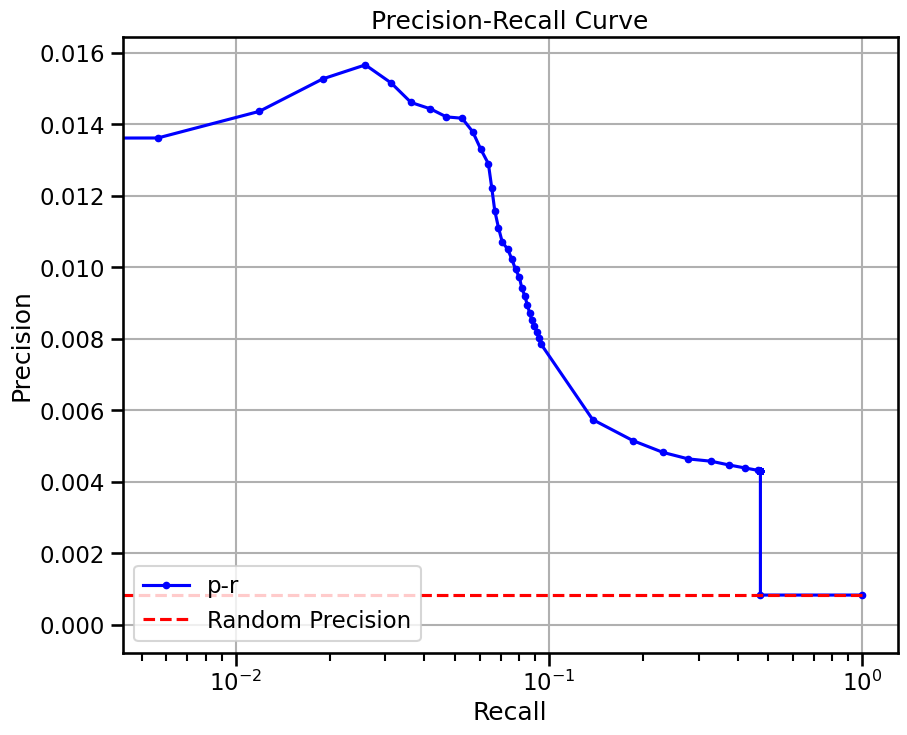

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:23,  2.35s/it]

 18%|█▊        | 2/11 [00:04<00:22,  2.49s/it]

 27%|██▋       | 3/11 [00:05<00:14,  1.77s/it]

 36%|███▋      | 4/11 [00:07<00:10,  1.56s/it]

 45%|████▌     | 5/11 [00:07<00:07,  1.32s/it]

 55%|█████▍    | 6/11 [00:09<00:06,  1.23s/it]

 64%|██████▎   | 7/11 [00:10<00:04,  1.16s/it]

 73%|███████▎  | 8/11 [00:11<00:03,  1.28s/it]

 82%|████████▏ | 9/11 [00:12<00:02,  1.21s/it]

 91%|█████████ | 10/11 [00:15<00:01,  1.83s/it]

100%|██████████| 11/11 [00:16<00:00,  1.50s/it]

100%|██████████| 11/11 [00:16<00:00,  1.53s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


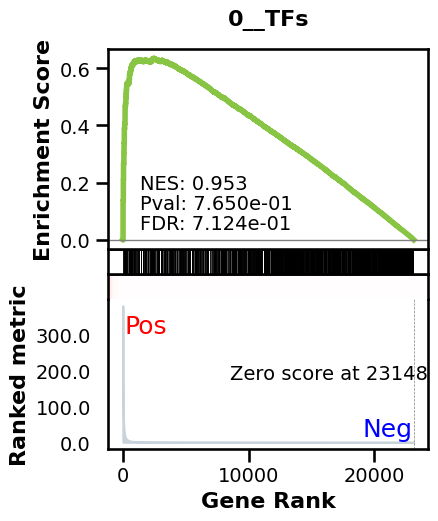

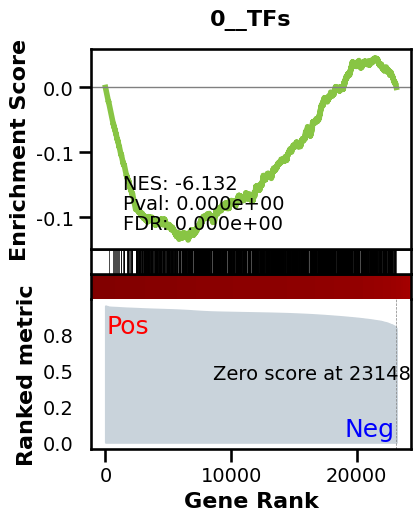

_________________________________________
TF specific enrichment


found some significant results for  66.07142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:31,  4.01it/s]

  2%|▏         | 2/128 [00:00<00:29,  4.22it/s]

  2%|▏         | 3/128 [00:00<00:29,  4.29it/s]

  3%|▎         | 4/128 [00:00<00:28,  4.33it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.35it/s]

  5%|▍         | 6/128 [00:01<00:27,  4.36it/s]

  5%|▌         | 7/128 [00:01<00:27,  4.37it/s]

  6%|▋         | 8/128 [00:01<00:27,  4.39it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.39it/s]

  8%|▊         | 10/128 [00:02<00:26,  4.40it/s]

  9%|▊         | 11/128 [00:02<00:27,  4.25it/s]

  9%|▉         | 12/128 [00:02<00:26,  4.30it/s]

 10%|█         | 13/128 [00:03<00:26,  4.33it/s]

 11%|█         | 14/128 [00:03<00:26,  4.36it/s]

 12%|█▏        | 15/128 [00:03<00:25,  4.38it/s]

 12%|█▎        | 16/128 [00:03<00:25,  4.39it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.41it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.40it/s]

 15%|█▍        | 19/128 [00:04<00:24,  4.39it/s]

 16%|█▌        | 20/128 [00:04<00:24,  4.38it/s]

 16%|█▋        | 21/128 [00:04<00:24,  4.39it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.39it/s]

 18%|█▊        | 23/128 [00:05<00:23,  4.39it/s]

 19%|█▉        | 24/128 [00:05<00:23,  4.39it/s]

 20%|█▉        | 25/128 [00:05<00:23,  4.40it/s]

 20%|██        | 26/128 [00:05<00:23,  4.40it/s]

 21%|██        | 27/128 [00:06<00:22,  4.41it/s]

 22%|██▏       | 28/128 [00:06<00:22,  4.41it/s]

 23%|██▎       | 29/128 [00:06<00:22,  4.42it/s]

 23%|██▎       | 30/128 [00:06<00:22,  4.41it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.41it/s]

 25%|██▌       | 32/128 [00:07<00:21,  4.42it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.42it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.43it/s]

 27%|██▋       | 35/128 [00:07<00:21,  4.42it/s]

 28%|██▊       | 36/128 [00:08<00:20,  4.41it/s]

 29%|██▉       | 37/128 [00:08<00:20,  4.40it/s]

 30%|██▉       | 38/128 [00:08<00:20,  4.39it/s]

 30%|███       | 39/128 [00:08<00:20,  4.40it/s]

 31%|███▏      | 40/128 [00:09<00:19,  4.40it/s]

 32%|███▏      | 41/128 [00:09<00:19,  4.41it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.41it/s]

 34%|███▎      | 43/128 [00:09<00:19,  4.41it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.42it/s]

 35%|███▌      | 45/128 [00:10<00:18,  4.42it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.42it/s]

 37%|███▋      | 47/128 [00:10<00:18,  4.41it/s]

 38%|███▊      | 48/128 [00:10<00:18,  4.42it/s]

 38%|███▊      | 49/128 [00:11<00:17,  4.42it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.43it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.43it/s]

 41%|████      | 52/128 [00:11<00:17,  4.42it/s]

 41%|████▏     | 53/128 [00:12<00:16,  4.41it/s]

 42%|████▏     | 54/128 [00:12<00:16,  4.40it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.39it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.39it/s]

 45%|████▍     | 57/128 [00:12<00:16,  4.39it/s]

 45%|████▌     | 58/128 [00:13<00:15,  4.40it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.40it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.40it/s]

 48%|████▊     | 61/128 [00:13<00:15,  4.41it/s]

 48%|████▊     | 62/128 [00:14<00:14,  4.41it/s]

 49%|████▉     | 63/128 [00:14<00:14,  4.40it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.40it/s]

 51%|█████     | 65/128 [00:14<00:14,  4.40it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.41it/s]

 52%|█████▏    | 67/128 [00:15<00:13,  4.42it/s]

 53%|█████▎    | 68/128 [00:15<00:13,  4.42it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.41it/s]

 55%|█████▍    | 70/128 [00:15<00:13,  4.40it/s]

 55%|█████▌    | 71/128 [00:16<00:12,  4.39it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.38it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.38it/s]

 58%|█████▊    | 74/128 [00:16<00:12,  4.39it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.40it/s]

 59%|█████▉    | 76/128 [00:17<00:11,  4.40it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.41it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.41it/s]

 62%|██████▏   | 79/128 [00:17<00:11,  4.41it/s]

 62%|██████▎   | 80/128 [00:18<00:10,  4.40it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.41it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.41it/s]

 65%|██████▍   | 83/128 [00:18<00:10,  4.41it/s]

 66%|██████▌   | 84/128 [00:19<00:09,  4.41it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.40it/s]

 67%|██████▋   | 86/128 [00:19<00:09,  4.41it/s]

 68%|██████▊   | 87/128 [00:19<00:09,  4.40it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.40it/s]

 70%|██████▉   | 89/128 [00:20<00:08,  4.39it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.39it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.40it/s]

 72%|███████▏  | 92/128 [00:20<00:08,  4.40it/s]

 73%|███████▎  | 93/128 [00:21<00:07,  4.41it/s]

 73%|███████▎  | 94/128 [00:21<00:07,  4.41it/s]

 74%|███████▍  | 95/128 [00:21<00:07,  4.42it/s]

 75%|███████▌  | 96/128 [00:21<00:07,  4.42it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.43it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.42it/s]

 77%|███████▋  | 99/128 [00:22<00:06,  4.43it/s]

 78%|███████▊  | 100/128 [00:22<00:06,  4.43it/s]

 79%|███████▉  | 101/128 [00:22<00:06,  4.44it/s]

 80%|███████▉  | 102/128 [00:23<00:05,  4.43it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.43it/s]

 81%|████████▏ | 104/128 [00:23<00:05,  4.41it/s]

 82%|████████▏ | 105/128 [00:23<00:05,  4.42it/s]

 83%|████████▎ | 106/128 [00:24<00:04,  4.40it/s]

 84%|████████▎ | 107/128 [00:24<00:04,  4.40it/s]

 84%|████████▍ | 108/128 [00:24<00:04,  4.41it/s]

 85%|████████▌ | 109/128 [00:24<00:04,  4.41it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.40it/s]

 87%|████████▋ | 111/128 [00:25<00:03,  4.36it/s]

 88%|████████▊ | 112/128 [00:25<00:03,  4.38it/s]

 88%|████████▊ | 113/128 [00:25<00:03,  4.38it/s]

 89%|████████▉ | 114/128 [00:25<00:03,  4.38it/s]

 90%|████████▉ | 115/128 [00:26<00:03,  4.33it/s]

 91%|█████████ | 116/128 [00:26<00:02,  4.35it/s]

 91%|█████████▏| 117/128 [00:26<00:02,  4.39it/s]

 92%|█████████▏| 118/128 [00:26<00:02,  4.41it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.41it/s]

 94%|█████████▍| 120/128 [00:27<00:01,  4.41it/s]

 95%|█████████▍| 121/128 [00:27<00:01,  4.41it/s]

 95%|█████████▌| 122/128 [00:27<00:01,  4.40it/s]

 96%|█████████▌| 123/128 [00:27<00:01,  4.41it/s]

 97%|█████████▋| 124/128 [00:28<00:00,  4.41it/s]

 98%|█████████▊| 125/128 [00:28<00:00,  4.25it/s]

 98%|█████████▊| 126/128 [00:28<00:00,  4.30it/s]

 99%|█████████▉| 127/128 [00:28<00:00,  4.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:29<00:00,  4.36it/s]

100%|██████████| 128/128 [00:29<00:00,  4.39it/s]

Average Precision (AP):  0.0010147323451319599
Area Under Precision-Recall Curve (AUPRC):  0.0010144436917221221


EPR: 1.8679351504459436


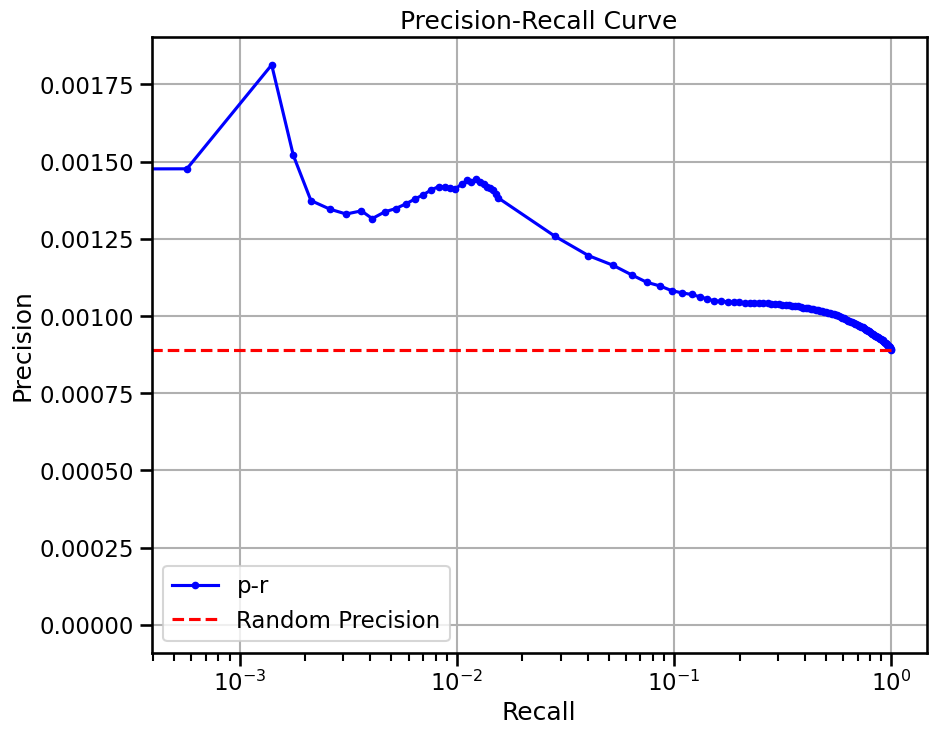

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:59,  2.83s/it]

  9%|▉         | 2/22 [00:04<00:38,  1.93s/it]

 14%|█▎        | 3/22 [00:05<00:31,  1.65s/it]

 18%|█▊        | 4/22 [00:06<00:26,  1.50s/it]

 23%|██▎       | 5/22 [00:07<00:24,  1.41s/it]

 27%|██▋       | 6/22 [00:09<00:22,  1.39s/it]

 32%|███▏      | 7/22 [00:10<00:20,  1.35s/it]

 36%|███▋      | 8/22 [00:12<00:19,  1.40s/it]

 41%|████      | 9/22 [00:13<00:17,  1.36s/it]

 45%|████▌     | 10/22 [00:14<00:17,  1.42s/it]

 50%|█████     | 11/22 [00:16<00:15,  1.41s/it]

 55%|█████▍    | 12/22 [00:18<00:16,  1.63s/it]

 59%|█████▉    | 13/22 [00:19<00:13,  1.54s/it]

 64%|██████▎   | 14/22 [00:21<00:11,  1.48s/it]

 68%|██████▊   | 15/22 [00:22<00:10,  1.46s/it]

 73%|███████▎  | 16/22 [00:23<00:08,  1.43s/it]

 77%|███████▋  | 17/22 [00:25<00:07,  1.41s/it]

 82%|████████▏ | 18/22 [00:27<00:06,  1.58s/it]

 86%|████████▋ | 19/22 [00:28<00:04,  1.49s/it]

 91%|█████████ | 20/22 [00:29<00:02,  1.47s/it]

 95%|█████████▌| 21/22 [00:31<00:01,  1.61s/it]

100%|██████████| 22/22 [00:33<00:00,  1.68s/it]

100%|██████████| 22/22 [00:33<00:00,  1.54s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


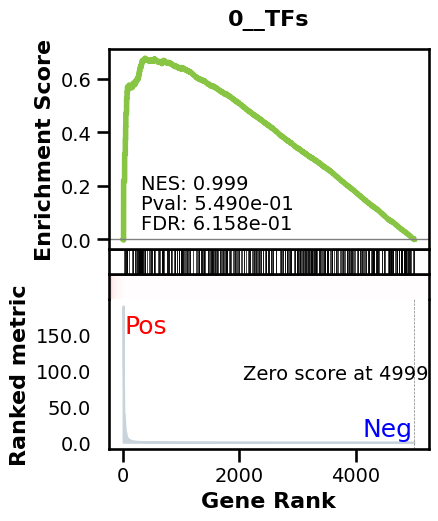

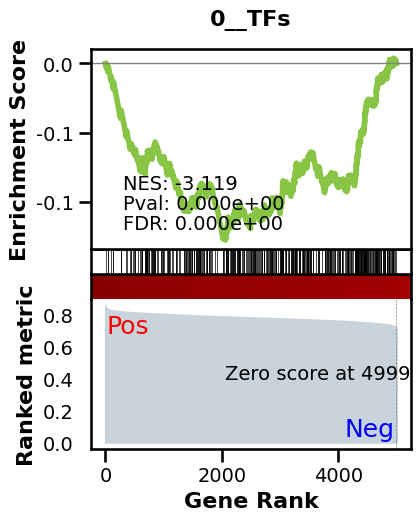

_________________________________________
TF specific enrichment


found some significant results for  15.625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.71it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.67it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.70it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.68it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.76it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.80it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.75it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.96it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.85it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.81it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.84it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.78it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.75it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.84it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.89it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.99it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.85it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.84it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.08it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.14it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.01it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.87it/s]

Average Precision (AP):  0.0014005163863877576
Area Under Precision-Recall Curve (AUPRC):  0.0013994279508707103


EPR: 0.7134623715815356


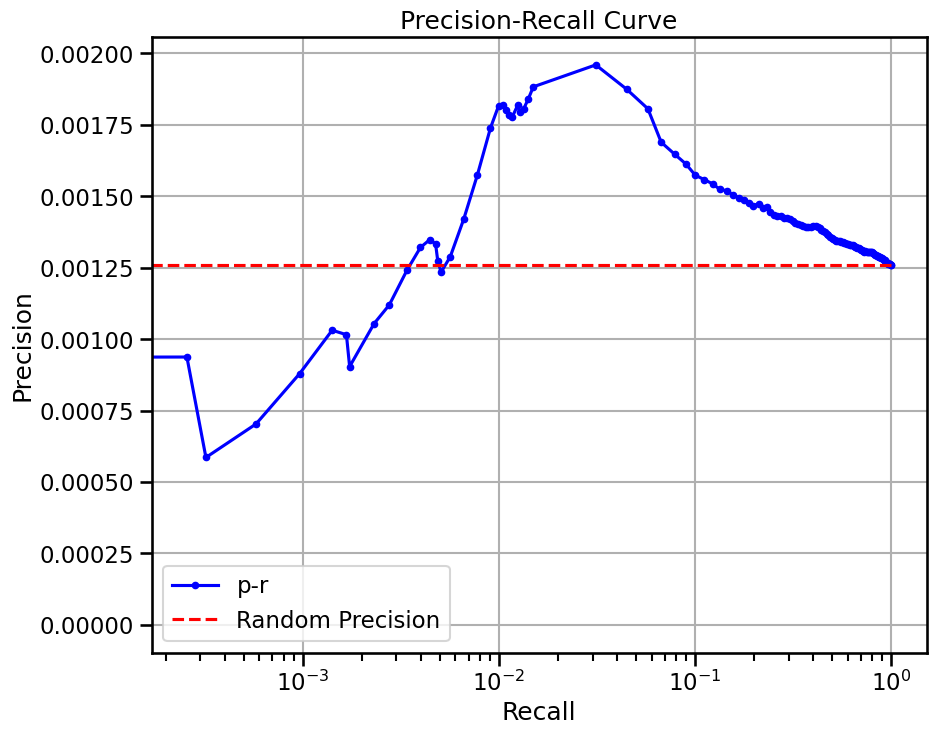

base enrichment


Top central genes: []


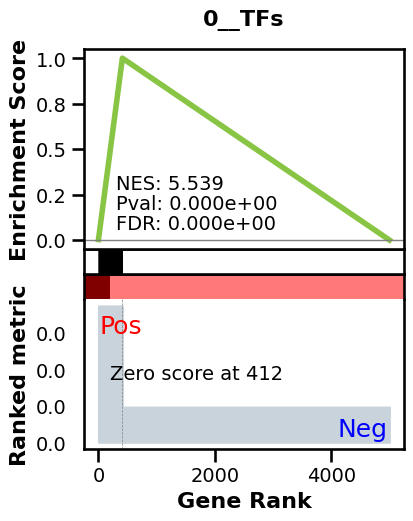

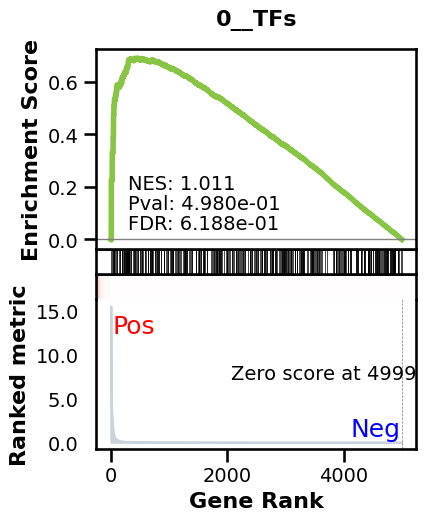

_________________________________________
TF specific enrichment


found some significant results for  9.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.97it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.79it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.88it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.93it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.48it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.25it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.17it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.11it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.61it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.58it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.59it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.58it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.53it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.59it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.57it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.54it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.33it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.32it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.39it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.48it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.62it/s]

Average Precision (AP):  0.0044301401795336735
Area Under Precision-Recall Curve (AUPRC):  0.004011650195614572
EPR: 7.304393703429819


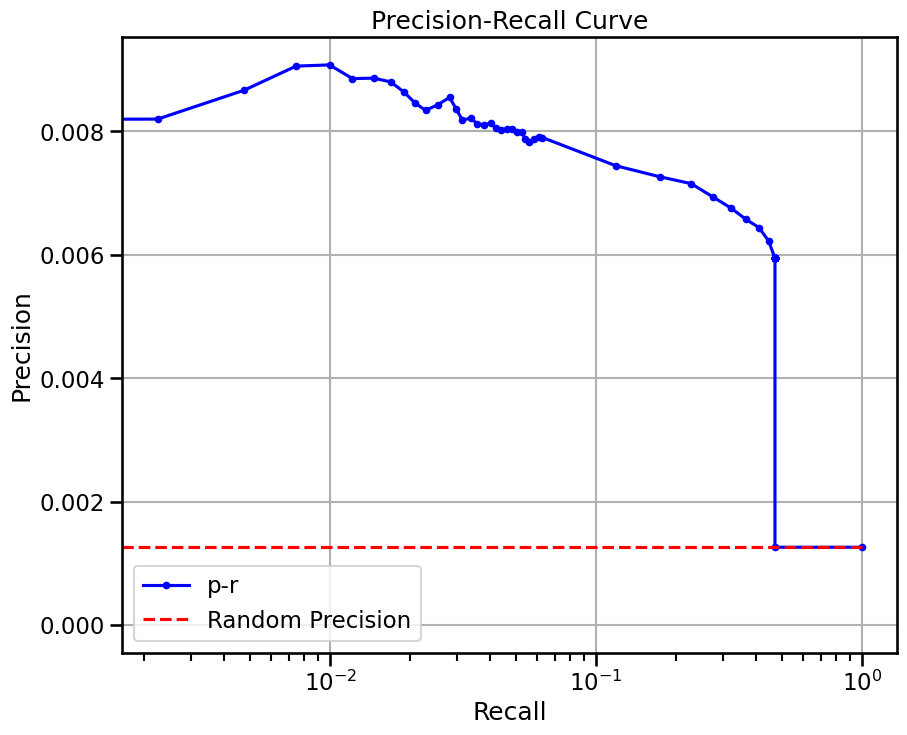

base enrichment


Top central genes: []
The DataFrame contains only the same values.


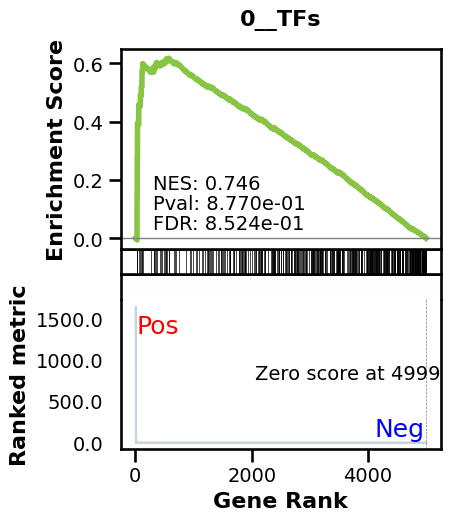

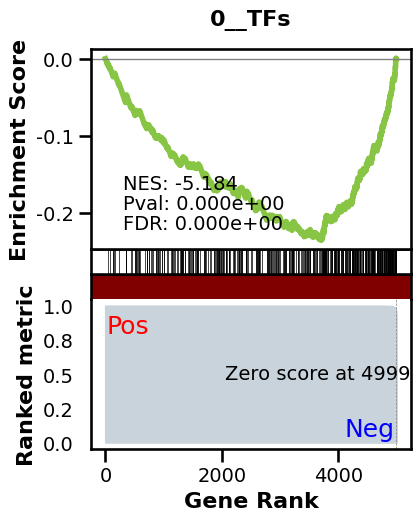

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.19it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.07it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.08it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.07it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.06it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.06it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.03it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.88it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.86it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.92it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.96it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.98it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.01it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.00it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.00it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.02it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.04it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.03it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.05it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.06it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.98it/s]

Average Precision (AP):  0.0018890277141562105
Area Under Precision-Recall Curve (AUPRC):  0.0018894344532951646
EPR: 1.7371594010847209


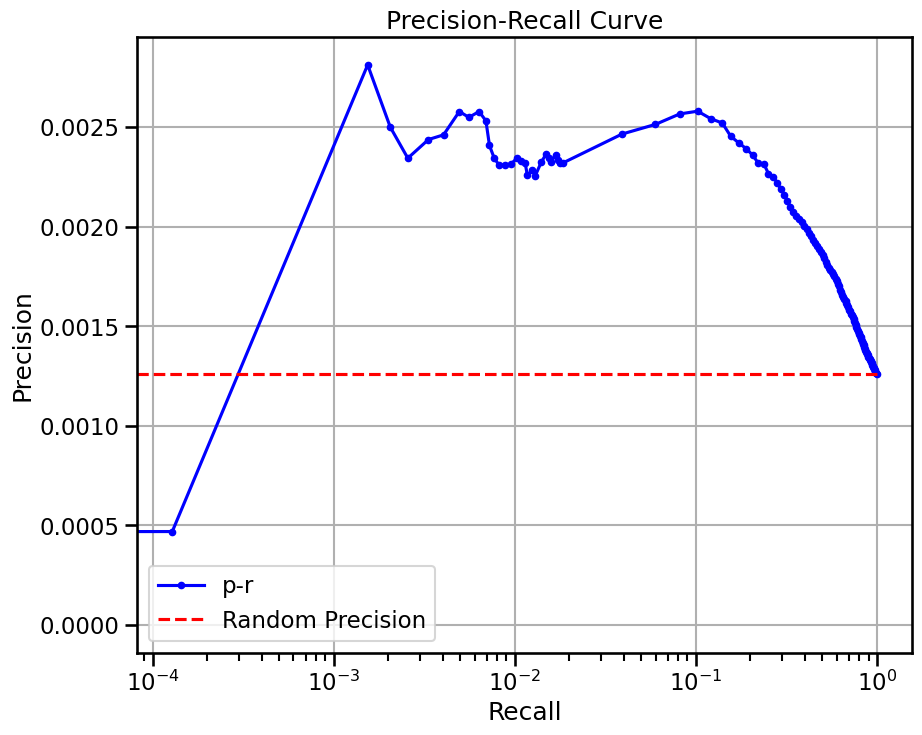

base enrichment


Top central genes: []


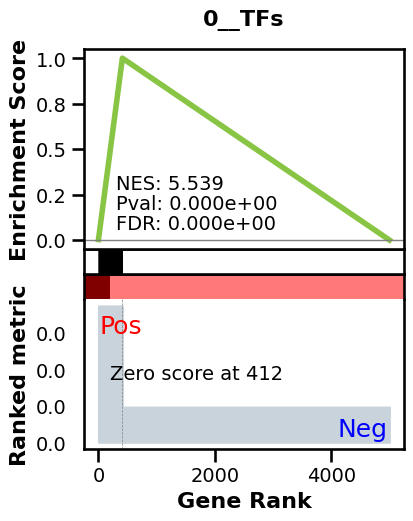

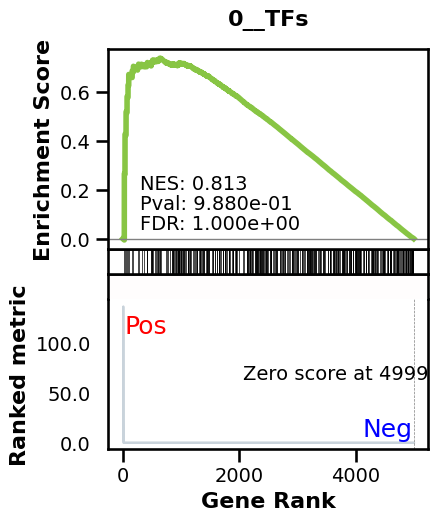

_________________________________________
TF specific enrichment


found some significant results for  4.6875 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.83it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.82it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.77it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.82it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.89it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.85it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.86it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.80it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.86it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.84it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.82it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.88it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.76it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.74it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.80it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.86it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.90it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.84it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.88it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.94it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.83it/s]

Average Precision (AP):  0.0060094456180633795
Area Under Precision-Recall Curve (AUPRC):  0.005570685819748773
EPR: 12.3237295387727


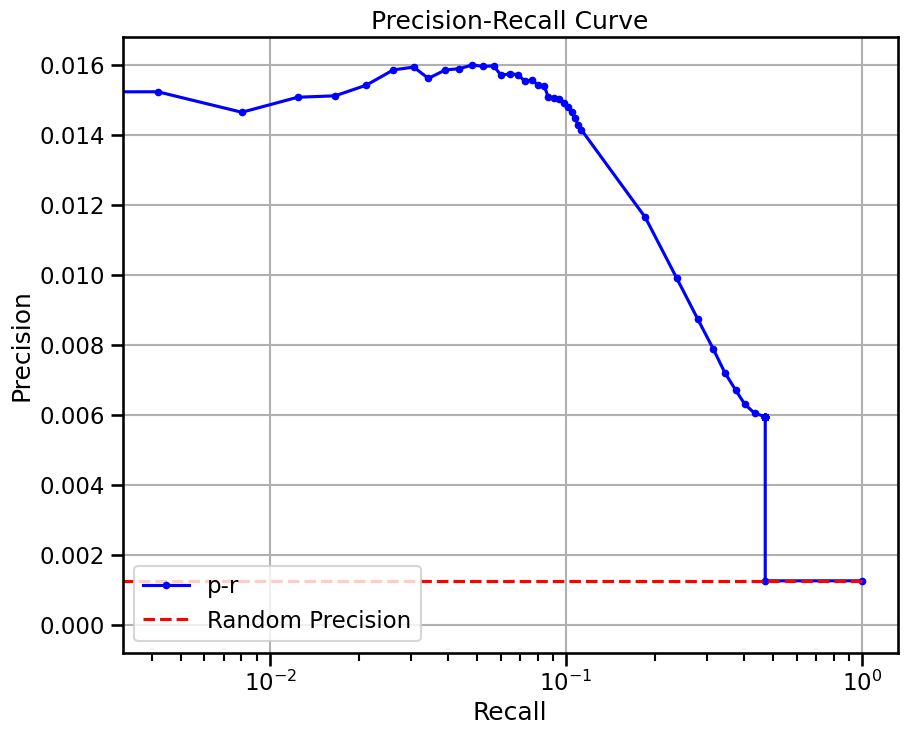

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

avg link count: 100861849, sparsity: 1.0


base enrichment
too many genes for central computation


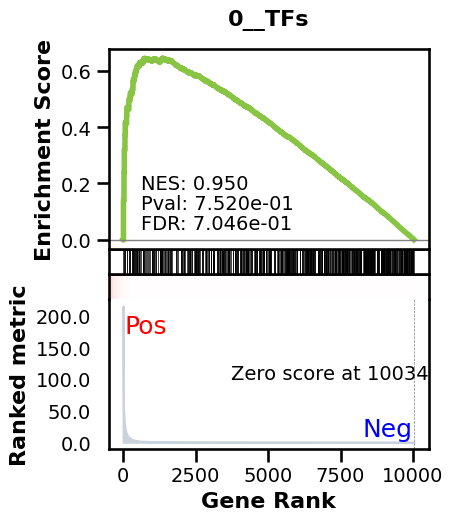

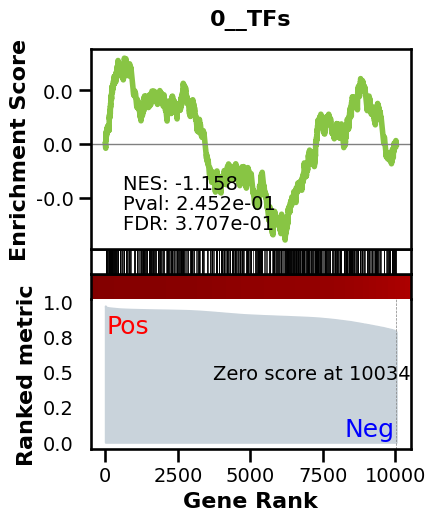

_________________________________________
TF specific enrichment


found some significant results for  48.38709677419355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 5873 genes
intersection pct: 0.5852516193323368
precision:  0.0009973869690676387 
recall:  1.0 
random precision: 0.0009975568237967033


  0%|          | 0/128 [00:00<?, ?it/s]

  2%|▏         | 2/128 [00:00<00:06, 19.91it/s]

  3%|▎         | 4/128 [00:00<00:06, 19.78it/s]

  5%|▍         | 6/128 [00:00<00:06, 19.78it/s]

  6%|▋         | 8/128 [00:00<00:06, 19.80it/s]

  8%|▊         | 10/128 [00:00<00:05, 19.83it/s]

  9%|▉         | 12/128 [00:00<00:05, 19.86it/s]

 11%|█         | 14/128 [00:00<00:05, 19.86it/s]

 12%|█▎        | 16/128 [00:00<00:05, 19.87it/s]

 14%|█▍        | 18/128 [00:00<00:05, 19.87it/s]

 16%|█▌        | 20/128 [00:01<00:05, 19.84it/s]

 17%|█▋        | 22/128 [00:01<00:05, 19.85it/s]

 19%|█▉        | 24/128 [00:01<00:05, 19.83it/s]

 20%|██        | 26/128 [00:01<00:05, 19.80it/s]

 22%|██▏       | 28/128 [00:01<00:05, 19.85it/s]

 23%|██▎       | 30/128 [00:01<00:04, 19.89it/s]

 25%|██▌       | 32/128 [00:01<00:04, 19.89it/s]

 27%|██▋       | 34/128 [00:01<00:04, 19.85it/s]

 28%|██▊       | 36/128 [00:01<00:04, 19.86it/s]

 30%|██▉       | 38/128 [00:01<00:04, 19.84it/s]

 31%|███▏      | 40/128 [00:02<00:04, 19.83it/s]

 33%|███▎      | 42/128 [00:02<00:04, 19.84it/s]

 34%|███▍      | 44/128 [00:02<00:04, 19.84it/s]

 36%|███▌      | 46/128 [00:02<00:04, 19.86it/s]

 38%|███▊      | 48/128 [00:02<00:04, 19.85it/s]

 39%|███▉      | 50/128 [00:02<00:03, 19.85it/s]

 41%|████      | 52/128 [00:02<00:03, 19.85it/s]

 42%|████▏     | 54/128 [00:02<00:03, 19.86it/s]

 44%|████▍     | 56/128 [00:02<00:03, 19.87it/s]

 45%|████▌     | 58/128 [00:02<00:03, 19.91it/s]

 47%|████▋     | 60/128 [00:03<00:03, 19.83it/s]

 48%|████▊     | 62/128 [00:03<00:03, 19.83it/s]

 50%|█████     | 64/128 [00:03<00:03, 19.83it/s]

 52%|█████▏    | 66/128 [00:03<00:03, 19.85it/s]

 53%|█████▎    | 68/128 [00:03<00:03, 19.86it/s]

 55%|█████▍    | 70/128 [00:03<00:02, 19.85it/s]

 56%|█████▋    | 72/128 [00:03<00:02, 19.87it/s]

 58%|█████▊    | 74/128 [00:03<00:02, 19.88it/s]

 59%|█████▉    | 76/128 [00:03<00:02, 19.78it/s]

 61%|██████    | 78/128 [00:03<00:02, 19.64it/s]

 62%|██████▎   | 80/128 [00:04<00:02, 19.59it/s]

 64%|██████▍   | 82/128 [00:04<00:02, 19.56it/s]

 66%|██████▌   | 84/128 [00:04<00:02, 19.55it/s]

 67%|██████▋   | 86/128 [00:04<00:02, 19.56it/s]

 69%|██████▉   | 88/128 [00:04<00:02, 19.60it/s]

 70%|███████   | 90/128 [00:04<00:01, 19.63it/s]

 72%|███████▏  | 92/128 [00:04<00:01, 19.61it/s]

 73%|███████▎  | 94/128 [00:04<00:01, 19.57it/s]

 75%|███████▌  | 96/128 [00:04<00:01, 19.58it/s]

 77%|███████▋  | 98/128 [00:04<00:01, 19.57it/s]

 78%|███████▊  | 100/128 [00:05<00:01, 19.63it/s]

 80%|███████▉  | 102/128 [00:05<00:01, 19.63it/s]

 81%|████████▏ | 104/128 [00:05<00:01, 19.71it/s]

 83%|████████▎ | 106/128 [00:05<00:01, 19.75it/s]

 84%|████████▍ | 108/128 [00:05<00:01, 19.74it/s]

 86%|████████▌ | 110/128 [00:05<00:00, 19.77it/s]

 88%|████████▊ | 112/128 [00:05<00:00, 19.79it/s]

 89%|████████▉ | 114/128 [00:05<00:00, 19.81it/s]

 91%|█████████ | 116/128 [00:05<00:00, 19.85it/s]

 92%|█████████▏| 118/128 [00:05<00:00, 19.85it/s]

 94%|█████████▍| 120/128 [00:06<00:00, 19.83it/s]

 95%|█████████▌| 122/128 [00:06<00:00, 19.87it/s]

 97%|█████████▋| 124/128 [00:06<00:00, 19.85it/s]

 98%|█████████▊| 126/128 [00:06<00:00, 19.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:06<00:00, 19.79it/s]

100%|██████████| 128/128 [00:06<00:00, 19.78it/s]

Average Precision (AP):  0.001116913396521288
Area Under Precision-Recall Curve (AUPRC):  0.001115548150230355


EPR: 1.5753253009371782


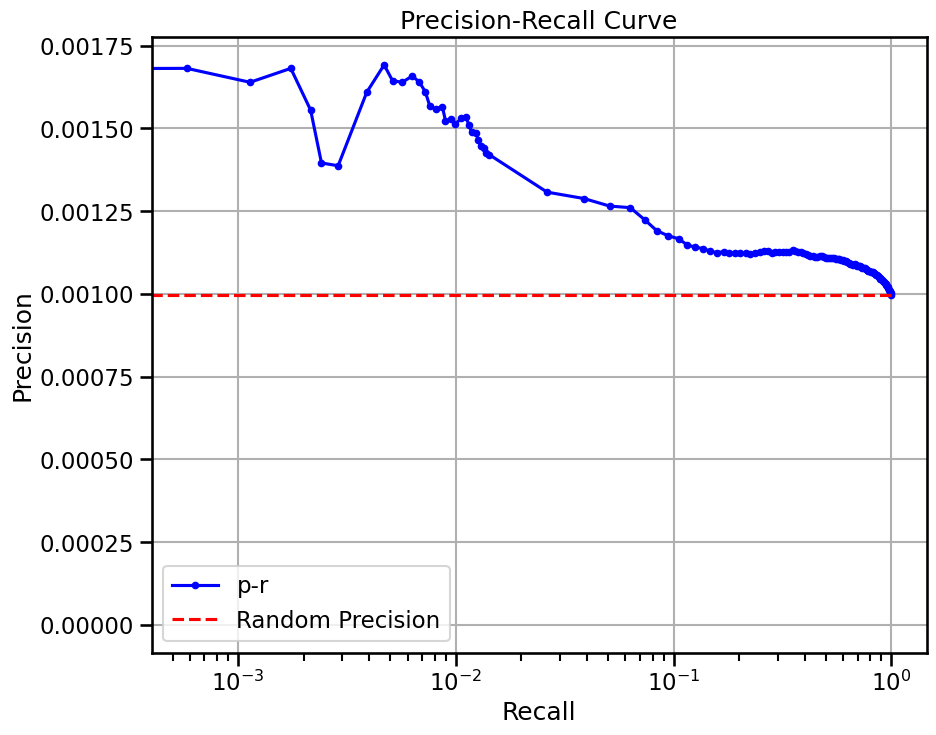

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


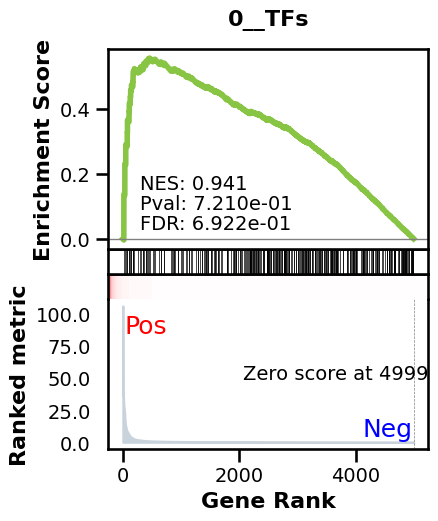

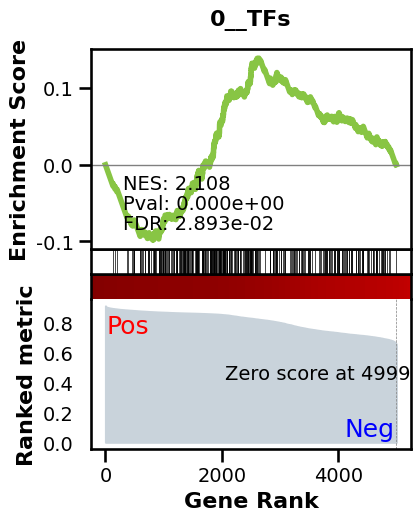

_________________________________________
TF specific enrichment


found some significant results for  34.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 89.74it/s]

 14%|█▍        | 18/128 [00:00<00:01, 89.35it/s]

 21%|██        | 27/128 [00:00<00:01, 89.47it/s]

 28%|██▊       | 36/128 [00:00<00:01, 89.67it/s]

 35%|███▌      | 45/128 [00:00<00:00, 89.47it/s]

 42%|████▏     | 54/128 [00:00<00:00, 89.46it/s]

 49%|████▉     | 63/128 [00:00<00:00, 89.62it/s]

 57%|█████▋    | 73/128 [00:00<00:00, 89.81it/s]

 64%|██████▍   | 82/128 [00:00<00:00, 89.62it/s]

 71%|███████   | 91/128 [00:01<00:00, 89.65it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 89.74it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 89.61it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 89.63it/s]

 99%|█████████▉| 127/128 [00:01<00:00, 89.70it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.54it/s]

Average Precision (AP):  0.0012948032229475276
Area Under Precision-Recall Curve (AUPRC):  0.001294134691136309
EPR: 0.579328785979101


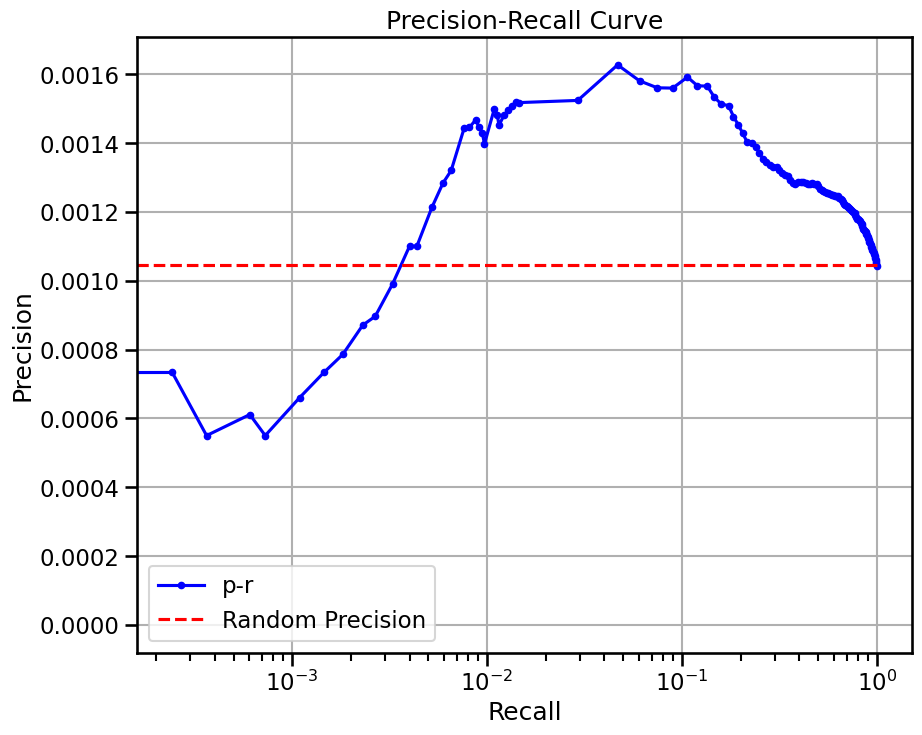

base enrichment


Top central genes: []


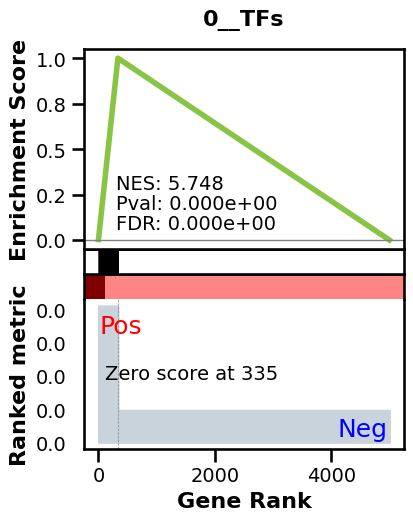

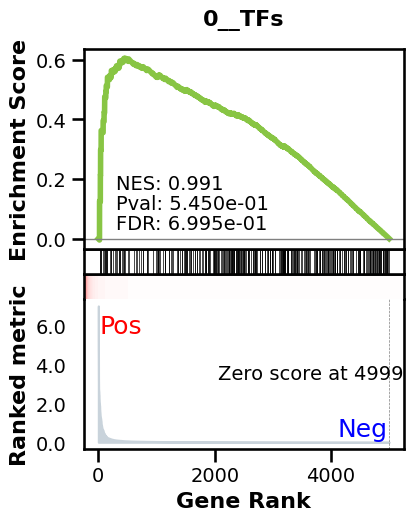

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.005769883888623644 
recall:  0.5679505813953488 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 83.78it/s]

 14%|█▍        | 18/128 [00:00<00:01, 85.24it/s]

 21%|██        | 27/128 [00:00<00:01, 84.98it/s]

 28%|██▊       | 36/128 [00:00<00:01, 85.06it/s]

 35%|███▌      | 45/128 [00:00<00:00, 84.91it/s]

 42%|████▏     | 54/128 [00:00<00:00, 84.84it/s]

 49%|████▉     | 63/128 [00:00<00:00, 84.45it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 84.31it/s]

 63%|██████▎   | 81/128 [00:00<00:00, 84.37it/s]

 70%|███████   | 90/128 [00:01<00:00, 84.49it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 84.52it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 84.50it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 84.12it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 84.27it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 84.43it/s]

Average Precision (AP):  0.005374944377424668
Area Under Precision-Recall Curve (AUPRC):  0.005068345665492707
EPR: 10.646251378675727


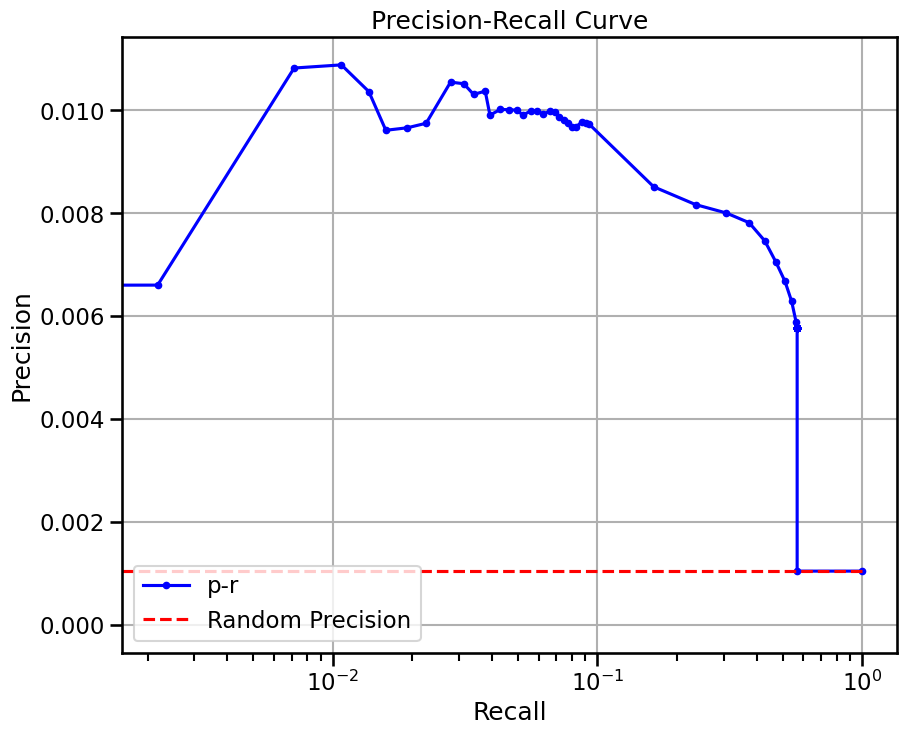

base enrichment


Top central genes: []
The DataFrame contains only the same values.


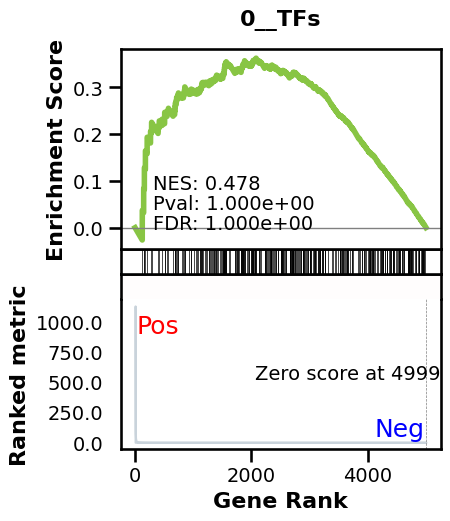

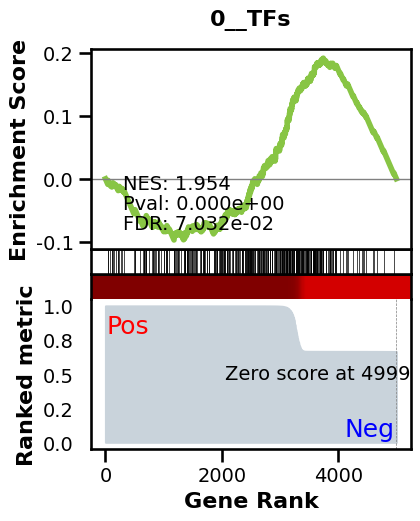

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 89.89it/s]

 14%|█▍        | 18/128 [00:00<00:01, 89.78it/s]

 21%|██        | 27/128 [00:00<00:01, 89.79it/s]

 28%|██▊       | 36/128 [00:00<00:01, 89.81it/s]

 35%|███▌      | 45/128 [00:00<00:00, 89.87it/s]

 42%|████▏     | 54/128 [00:00<00:00, 89.90it/s]

 50%|█████     | 64/128 [00:00<00:00, 89.97it/s]

 58%|█████▊    | 74/128 [00:00<00:00, 90.01it/s]

 66%|██████▌   | 84/128 [00:00<00:00, 89.99it/s]

 73%|███████▎  | 93/128 [00:01<00:00, 89.83it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 89.88it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 89.94it/s]

 95%|█████████▌| 122/128 [00:01<00:00, 89.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 89.88it/s]

Average Precision (AP):  0.0011576720815504491
Area Under Precision-Recall Curve (AUPRC):  0.001144369960223768
EPR: 2.2089430445794345


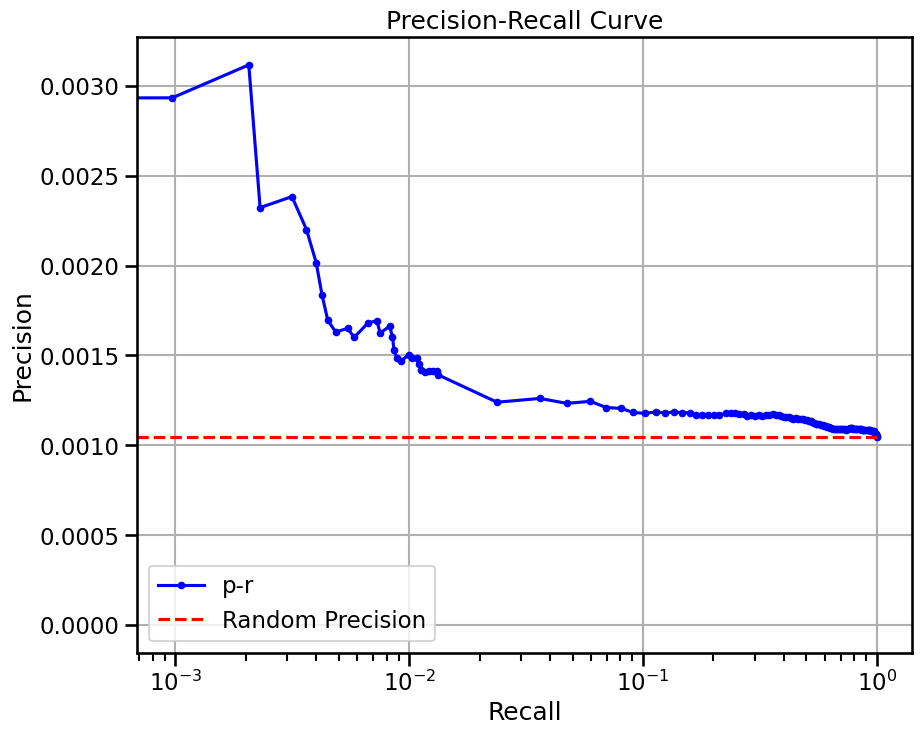

base enrichment


Top central genes: []


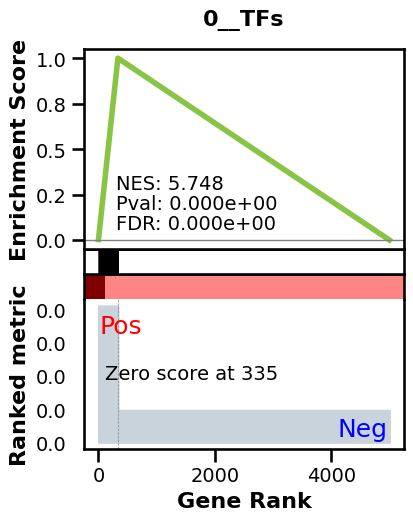

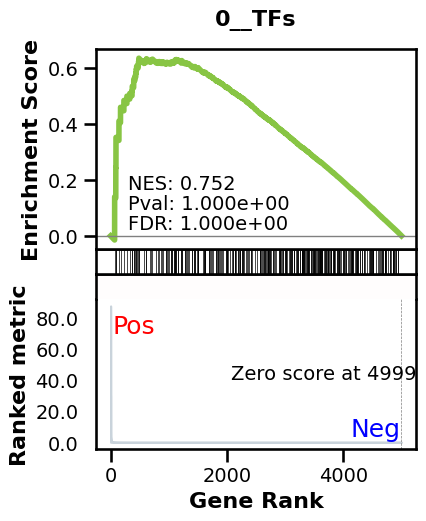

_________________________________________
TF specific enrichment


found some significant results for  3.125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.005769883888623644 
recall:  0.5679505813953488 
random precision: 0.0010444641124863559


  0%|          | 0/128 [00:00<?, ?it/s]

  7%|▋         | 9/128 [00:00<00:01, 88.92it/s]

 15%|█▍        | 19/128 [00:00<00:01, 90.44it/s]

 23%|██▎       | 29/128 [00:00<00:01, 90.51it/s]

 30%|███       | 39/128 [00:00<00:00, 90.64it/s]

 38%|███▊      | 49/128 [00:00<00:00, 90.68it/s]

 46%|████▌     | 59/128 [00:00<00:00, 90.54it/s]

 54%|█████▍    | 69/128 [00:00<00:00, 90.61it/s]

 62%|██████▏   | 79/128 [00:00<00:00, 90.64it/s]

 70%|██████▉   | 89/128 [00:00<00:00, 90.61it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 90.56it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 90.59it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 90.62it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 90.53it/s]

Average Precision (AP):  0.0042048994442138495
Area Under Precision-Recall Curve (AUPRC):  0.003852185026080777
EPR: 7.403313006704824


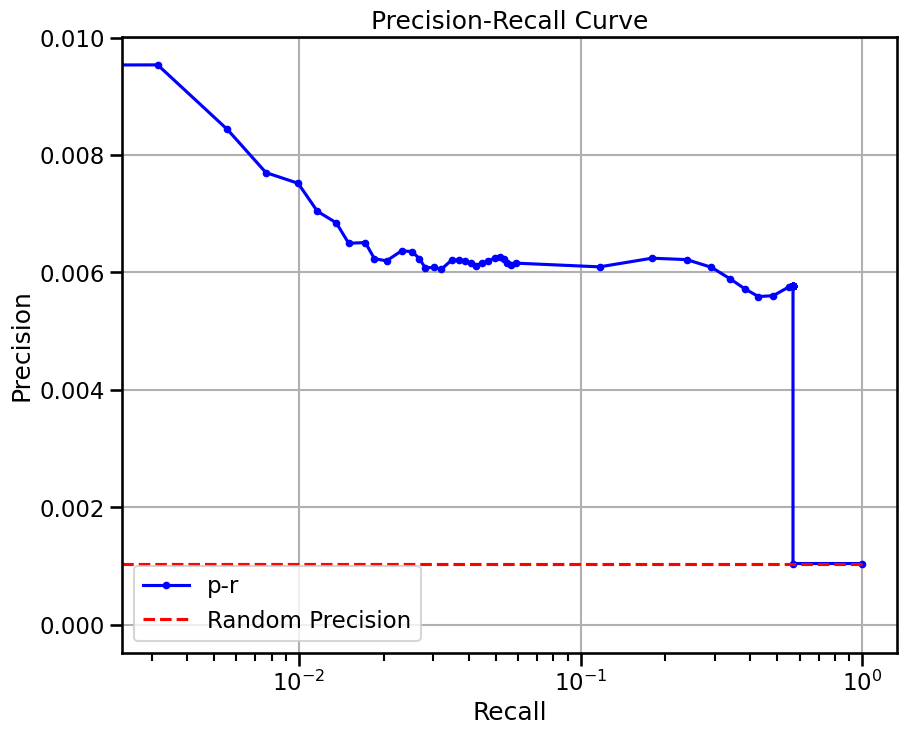

  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:02<00:13,  2.19s/it]

 29%|██▊       | 2/7 [00:03<00:06,  1.40s/it]

 43%|████▎     | 3/7 [00:03<00:04,  1.14s/it]

 57%|█████▋    | 4/7 [00:04<00:03,  1.05s/it]

 71%|███████▏  | 5/7 [00:05<00:01,  1.01it/s]

 86%|████████▌ | 6/7 [00:06<00:00,  1.05it/s]

100%|██████████| 7/7 [00:07<00:00,  1.14it/s]

100%|██████████| 7/7 [00:07<00:00,  1.07s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


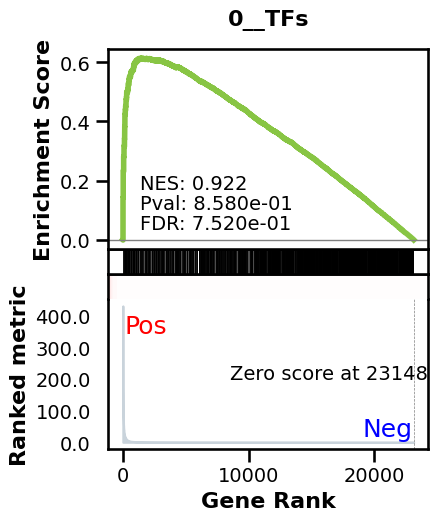

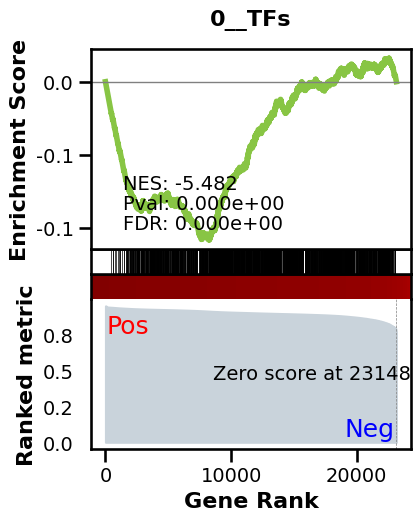

_________________________________________
TF specific enrichment


found some significant results for  69.64285714285714 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:28,  4.38it/s]

  2%|▏         | 2/128 [00:00<00:28,  4.38it/s]

  2%|▏         | 3/128 [00:00<00:28,  4.36it/s]

  3%|▎         | 4/128 [00:00<00:28,  4.36it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.36it/s]

  5%|▍         | 6/128 [00:01<00:27,  4.37it/s]

  5%|▌         | 7/128 [00:01<00:27,  4.37it/s]

  6%|▋         | 8/128 [00:01<00:27,  4.37it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.37it/s]

  8%|▊         | 10/128 [00:02<00:27,  4.37it/s]

  9%|▊         | 11/128 [00:02<00:26,  4.37it/s]

  9%|▉         | 12/128 [00:02<00:26,  4.37it/s]

 10%|█         | 13/128 [00:02<00:26,  4.37it/s]

 11%|█         | 14/128 [00:03<00:26,  4.37it/s]

 12%|█▏        | 15/128 [00:03<00:25,  4.38it/s]

 12%|█▎        | 16/128 [00:03<00:25,  4.37it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.37it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.37it/s]

 15%|█▍        | 19/128 [00:04<00:24,  4.38it/s]

 16%|█▌        | 20/128 [00:04<00:24,  4.38it/s]

 16%|█▋        | 21/128 [00:04<00:24,  4.38it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.37it/s]

 18%|█▊        | 23/128 [00:05<00:23,  4.38it/s]

 19%|█▉        | 24/128 [00:05<00:23,  4.38it/s]

 20%|█▉        | 25/128 [00:05<00:23,  4.38it/s]

 20%|██        | 26/128 [00:05<00:23,  4.38it/s]

 21%|██        | 27/128 [00:06<00:23,  4.37it/s]

 22%|██▏       | 28/128 [00:06<00:22,  4.37it/s]

 23%|██▎       | 29/128 [00:06<00:22,  4.37it/s]

 23%|██▎       | 30/128 [00:06<00:22,  4.37it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.36it/s]

 25%|██▌       | 32/128 [00:07<00:21,  4.37it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.36it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.37it/s]

 27%|██▋       | 35/128 [00:08<00:21,  4.37it/s]

 28%|██▊       | 36/128 [00:08<00:21,  4.38it/s]

 29%|██▉       | 37/128 [00:08<00:20,  4.38it/s]

 30%|██▉       | 38/128 [00:08<00:20,  4.37it/s]

 30%|███       | 39/128 [00:08<00:20,  4.37it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.37it/s]

 32%|███▏      | 41/128 [00:09<00:19,  4.37it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.37it/s]

 34%|███▎      | 43/128 [00:09<00:19,  4.37it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.37it/s]

 35%|███▌      | 45/128 [00:10<00:19,  4.37it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.37it/s]

 37%|███▋      | 47/128 [00:10<00:18,  4.36it/s]

 38%|███▊      | 48/128 [00:10<00:18,  4.36it/s]

 38%|███▊      | 49/128 [00:11<00:18,  4.36it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.37it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.37it/s]

 41%|████      | 52/128 [00:11<00:17,  4.37it/s]

 41%|████▏     | 53/128 [00:12<00:17,  4.37it/s]

 42%|████▏     | 54/128 [00:12<00:16,  4.37it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.36it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]

 45%|████▍     | 57/128 [00:13<00:16,  4.37it/s]

 45%|████▌     | 58/128 [00:13<00:16,  4.36it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.36it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.36it/s]

 48%|████▊     | 61/128 [00:13<00:15,  4.37it/s]

 48%|████▊     | 62/128 [00:14<00:15,  4.36it/s]

 49%|████▉     | 63/128 [00:14<00:14,  4.36it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.36it/s]

 51%|█████     | 65/128 [00:14<00:14,  4.36it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]

 52%|█████▏    | 67/128 [00:15<00:13,  4.36it/s]

 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.36it/s]

 55%|█████▍    | 70/128 [00:16<00:13,  4.36it/s]

 55%|█████▌    | 71/128 [00:16<00:13,  4.37it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.37it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.37it/s]

 58%|█████▊    | 74/128 [00:16<00:12,  4.37it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.37it/s]

 59%|█████▉    | 76/128 [00:17<00:11,  4.36it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.37it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.36it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.36it/s]

 62%|██████▎   | 80/128 [00:18<00:10,  4.37it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.37it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.37it/s]

 65%|██████▍   | 83/128 [00:18<00:10,  4.37it/s]

 66%|██████▌   | 84/128 [00:19<00:10,  4.37it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.37it/s]

 67%|██████▋   | 86/128 [00:19<00:09,  4.36it/s]

 68%|██████▊   | 87/128 [00:19<00:09,  4.36it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.36it/s]

 70%|██████▉   | 89/128 [00:20<00:08,  4.36it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.36it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.36it/s]

 72%|███████▏  | 92/128 [00:21<00:08,  4.36it/s]

 73%|███████▎  | 93/128 [00:21<00:08,  4.36it/s]

 73%|███████▎  | 94/128 [00:21<00:07,  4.36it/s]

 74%|███████▍  | 95/128 [00:21<00:07,  4.35it/s]

 75%|███████▌  | 96/128 [00:21<00:07,  4.36it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.36it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.37it/s]

 77%|███████▋  | 99/128 [00:22<00:06,  4.37it/s]

 78%|███████▊  | 100/128 [00:22<00:06,  4.37it/s]

 79%|███████▉  | 101/128 [00:23<00:06,  4.36it/s]

 80%|███████▉  | 102/128 [00:23<00:05,  4.37it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.37it/s]

 81%|████████▏ | 104/128 [00:23<00:05,  4.37it/s]

 82%|████████▏ | 105/128 [00:24<00:05,  4.37it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.37it/s]

 84%|████████▎ | 107/128 [00:24<00:04,  4.37it/s]

 84%|████████▍ | 108/128 [00:24<00:04,  4.37it/s]

 85%|████████▌ | 109/128 [00:24<00:04,  4.37it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.36it/s]

 87%|████████▋ | 111/128 [00:25<00:03,  4.36it/s]

 88%|████████▊ | 112/128 [00:25<00:03,  4.36it/s]

 88%|████████▊ | 113/128 [00:25<00:03,  4.36it/s]

 89%|████████▉ | 114/128 [00:26<00:03,  4.36it/s]

 90%|████████▉ | 115/128 [00:26<00:02,  4.37it/s]

 91%|█████████ | 116/128 [00:26<00:02,  4.37it/s]

 91%|█████████▏| 117/128 [00:26<00:02,  4.37it/s]

 92%|█████████▏| 118/128 [00:27<00:02,  4.37it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.37it/s]

 94%|█████████▍| 120/128 [00:27<00:01,  4.37it/s]

 95%|█████████▍| 121/128 [00:27<00:01,  4.37it/s]

 95%|█████████▌| 122/128 [00:27<00:01,  4.38it/s]

 96%|█████████▌| 123/128 [00:28<00:01,  4.37it/s]

 97%|█████████▋| 124/128 [00:28<00:00,  4.37it/s]

 98%|█████████▊| 125/128 [00:28<00:00,  4.37it/s]

 98%|█████████▊| 126/128 [00:28<00:00,  4.37it/s]

 99%|█████████▉| 127/128 [00:29<00:00,  4.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:29<00:00,  4.37it/s]

100%|██████████| 128/128 [00:29<00:00,  4.37it/s]

Average Precision (AP):  0.001057006676509758
Area Under Precision-Recall Curve (AUPRC):  0.0010563862819710206


EPR: 1.8515675265406064


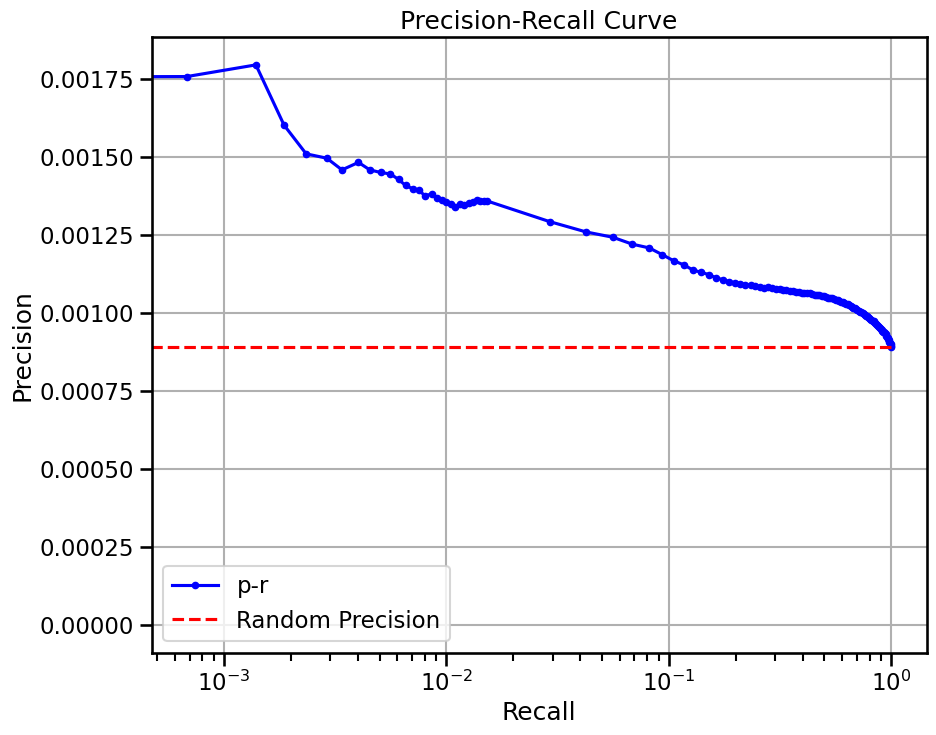

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:02<00:30,  2.33s/it]

 14%|█▍        | 2/14 [00:03<00:20,  1.70s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.47s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:07<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:08<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.19s/it]

 64%|██████▍   | 9/14 [00:11<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.16s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.16s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.16s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.15s/it]

100%|██████████| 14/14 [00:17<00:00,  1.04s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


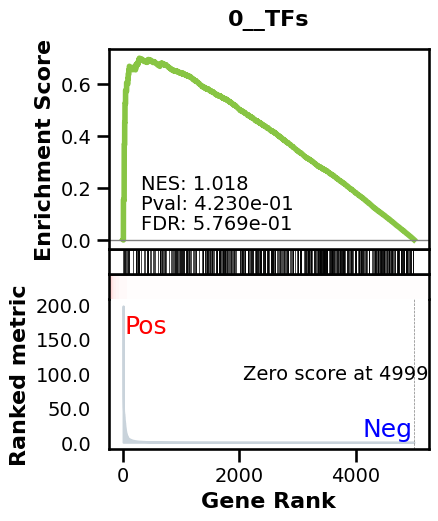

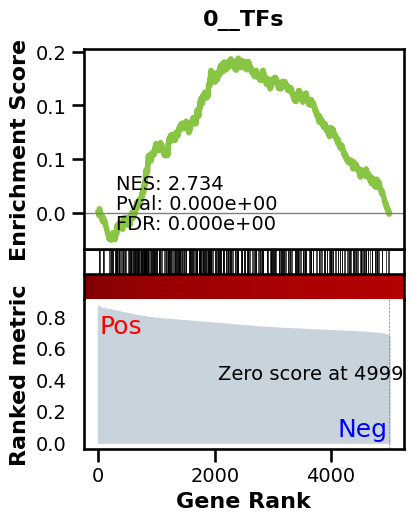

_________________________________________
TF specific enrichment


found some significant results for  29.09090909090909 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.32it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.28it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.37it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.37it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.34it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.32it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.29it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.29it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.26it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.27it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.20it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.22it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.21it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.17it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.21it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.28it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.30it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.32it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.32it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.28it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.29it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.25it/s]

Average Precision (AP):  0.001738965808926596
Area Under Precision-Recall Curve (AUPRC):  0.001736668534407967
EPR: 1.618165553046366


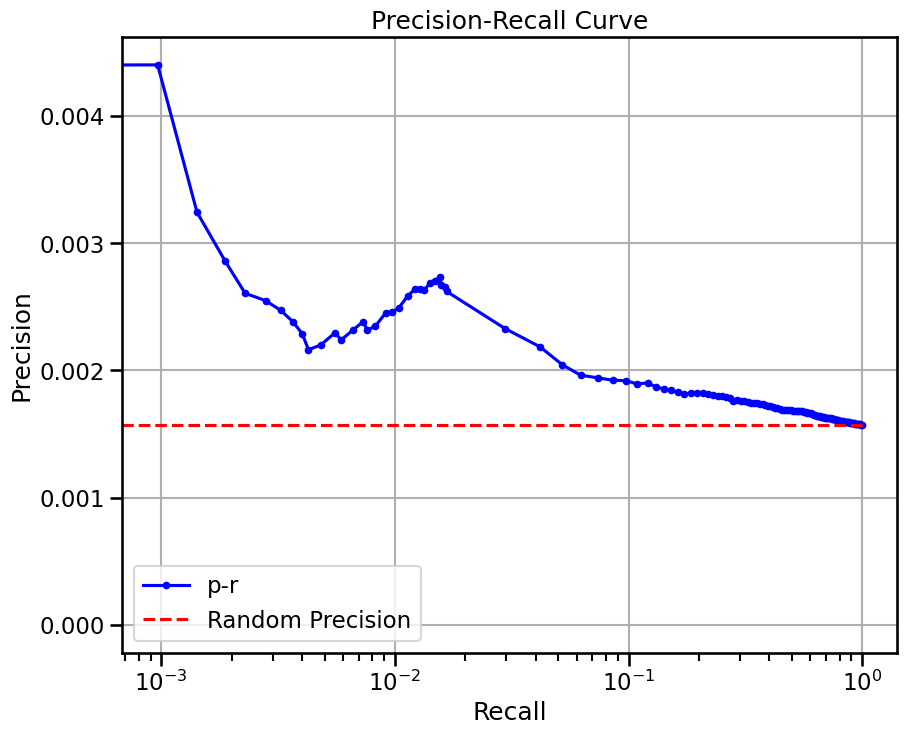

base enrichment


Top central genes: []


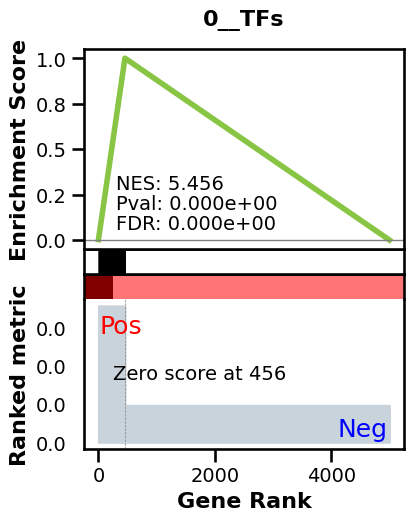

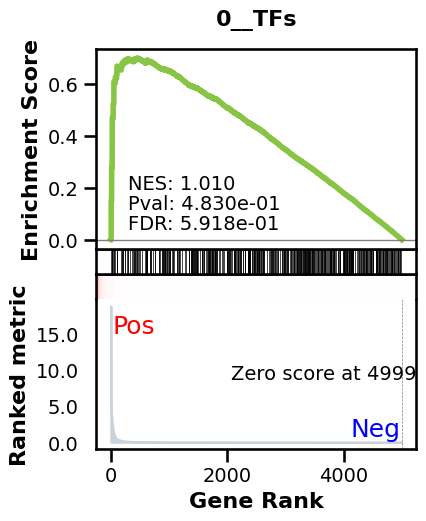

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 51.57it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.35it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.28it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.28it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.27it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.26it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.23it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.22it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.27it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.28it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.22it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.19it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.17it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.17it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.18it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.21it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.79it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.80it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.92it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.98it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.06it/s]

Average Precision (AP):  0.005506767044873202
Area Under Precision-Recall Curve (AUPRC):  0.005075542948873533
EPR: 7.582059873710058


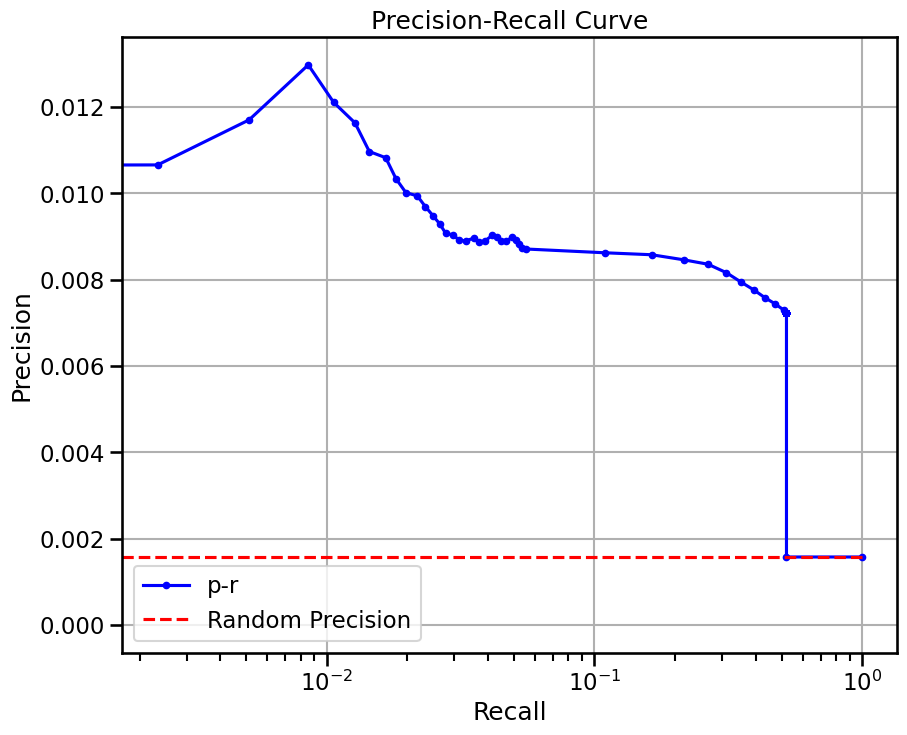

base enrichment


Top central genes: []
The DataFrame contains only the same values.


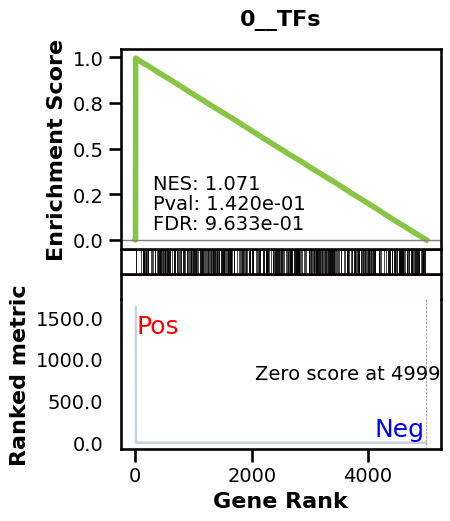

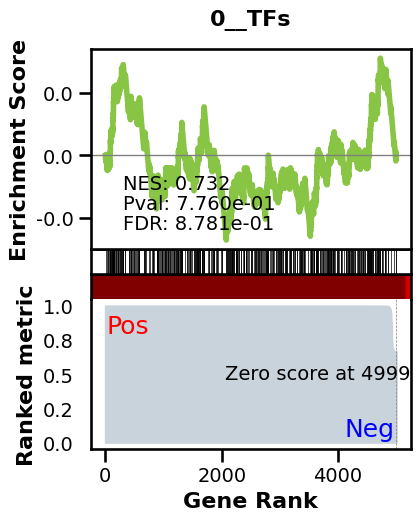

_________________________________________
TF specific enrichment


found some significant results for  14.545454545454545 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.24it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.10it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.17it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.10it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.11it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.11it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.04it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.02it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.92it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.95it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.06it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.13it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.07it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.10it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.15it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.13it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.16it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.13it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.04it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.05it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.06it/s]

Average Precision (AP):  0.0020381658248595524
Area Under Precision-Recall Curve (AUPRC):  0.002032308960959235
EPR: 2.0089823089392


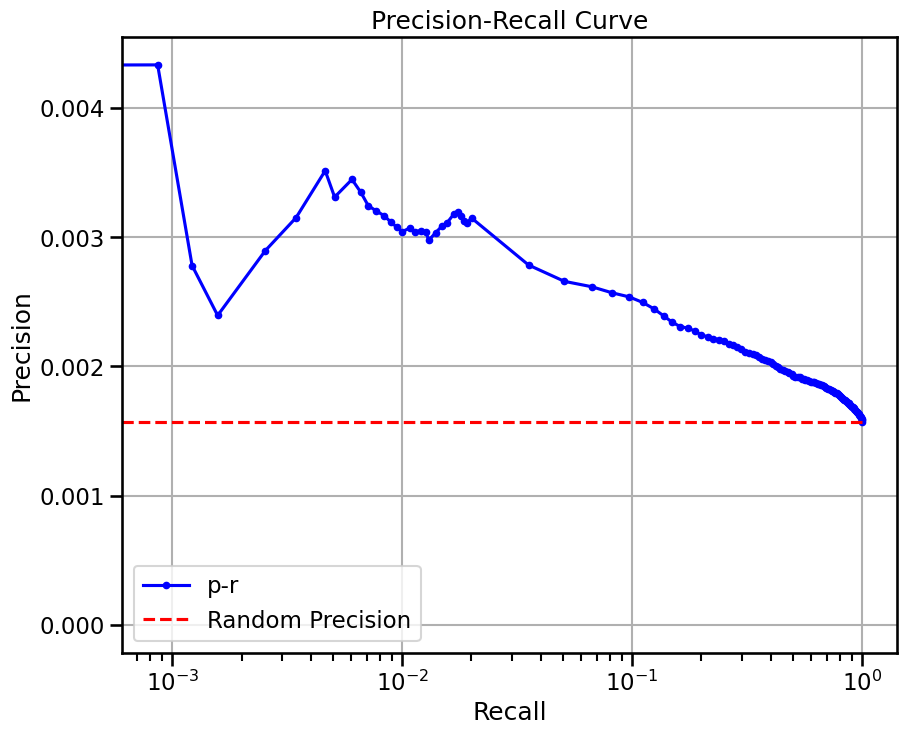

base enrichment


Top central genes: []


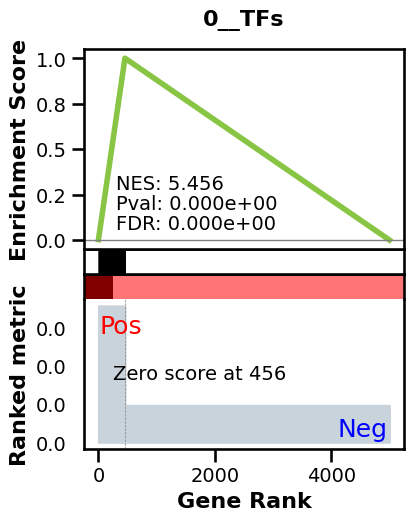

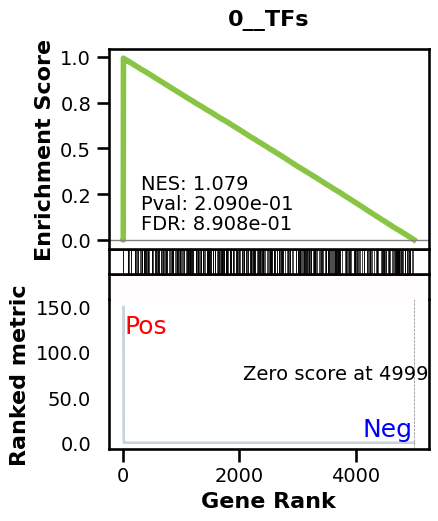

_________________________________________
TF specific enrichment


found some significant results for  7.2727272727272725 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.007216602122232253 
recall:  0.5214652237971854 
random precision: 0.0015728901911201826


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.71it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.65it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.68it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.71it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.81it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.90it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.94it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.94it/s]

 42%|████▏     | 54/128 [00:01<00:01, 54.01it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.02it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.03it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.03it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.00it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.04it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.06it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.08it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.06it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 54.06it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 43.69it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 46.36it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 48.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.07it/s]

Average Precision (AP):  0.006142174071692528
Area Under Precision-Recall Curve (AUPRC):  0.00573239588002909
EPR: 9.073572668362264


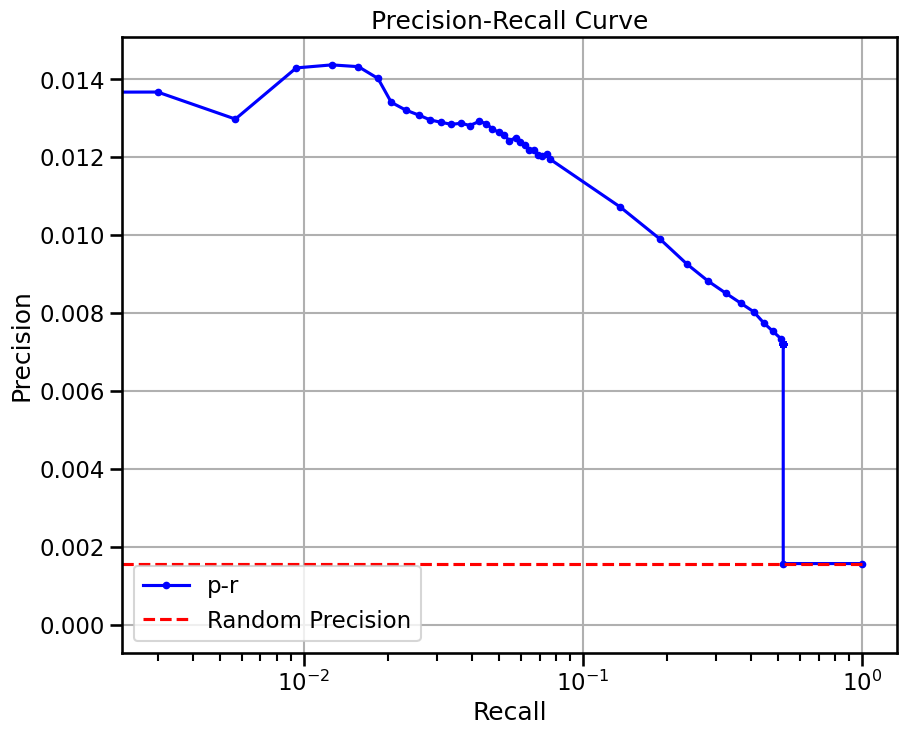

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:21,  2.10s/it]

 18%|█▊        | 2/11 [00:02<00:12,  1.38s/it]

 27%|██▋       | 3/11 [00:03<00:09,  1.14s/it]

 36%|███▋      | 4/11 [00:04<00:07,  1.02s/it]

 45%|████▌     | 5/11 [00:05<00:05,  1.04it/s]

 55%|█████▍    | 6/11 [00:06<00:04,  1.08it/s]

 64%|██████▎   | 7/11 [00:07<00:03,  1.10it/s]

 73%|███████▎  | 8/11 [00:08<00:02,  1.11it/s]

 82%|████████▏ | 9/11 [00:09<00:01,  1.12it/s]

 91%|█████████ | 10/11 [00:09<00:00,  1.14it/s]

100%|██████████| 11/11 [00:10<00:00,  1.17it/s]

100%|██████████| 11/11 [00:10<00:00,  1.01it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


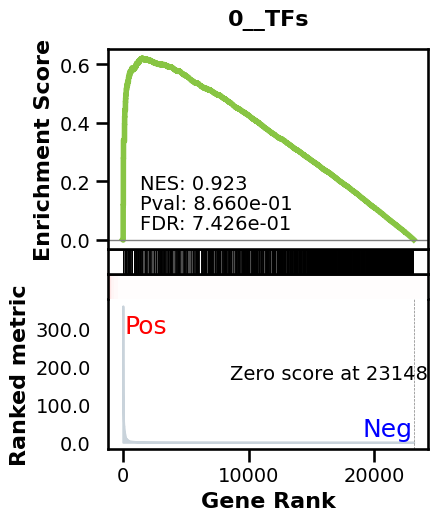

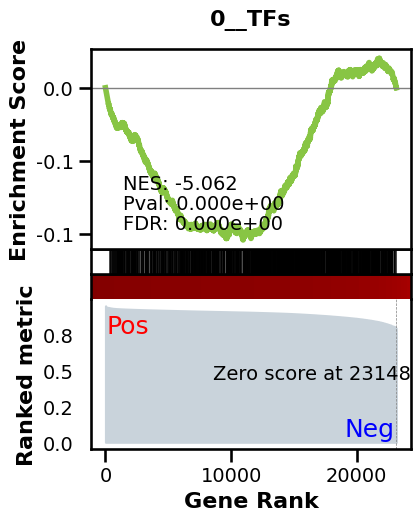

_________________________________________
TF specific enrichment


found some significant results for  61.607142857142854 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:29,  4.34it/s]

  2%|▏         | 2/128 [00:00<00:29,  4.33it/s]

  2%|▏         | 3/128 [00:00<00:28,  4.33it/s]

  3%|▎         | 4/128 [00:00<00:28,  4.34it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.34it/s]

  5%|▍         | 6/128 [00:01<00:28,  4.34it/s]

  5%|▌         | 7/128 [00:01<00:27,  4.34it/s]

  6%|▋         | 8/128 [00:01<00:27,  4.34it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.33it/s]

  8%|▊         | 10/128 [00:02<00:27,  4.33it/s]

  9%|▊         | 11/128 [00:02<00:26,  4.33it/s]

  9%|▉         | 12/128 [00:02<00:26,  4.33it/s]

 10%|█         | 13/128 [00:02<00:26,  4.34it/s]

 11%|█         | 14/128 [00:03<00:26,  4.34it/s]

 12%|█▏        | 15/128 [00:03<00:26,  4.32it/s]

 12%|█▎        | 16/128 [00:03<00:25,  4.33it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.33it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.33it/s]

 15%|█▍        | 19/128 [00:04<00:25,  4.33it/s]

 16%|█▌        | 20/128 [00:04<00:24,  4.34it/s]

 16%|█▋        | 21/128 [00:04<00:24,  4.33it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.34it/s]

 18%|█▊        | 23/128 [00:05<00:24,  4.33it/s]

 19%|█▉        | 24/128 [00:05<00:23,  4.34it/s]

 20%|█▉        | 25/128 [00:05<00:23,  4.33it/s]

 20%|██        | 26/128 [00:05<00:23,  4.34it/s]

 21%|██        | 27/128 [00:06<00:23,  4.33it/s]

 22%|██▏       | 28/128 [00:06<00:23,  4.33it/s]

 23%|██▎       | 29/128 [00:06<00:22,  4.34it/s]

 23%|██▎       | 30/128 [00:06<00:22,  4.34it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.34it/s]

 25%|██▌       | 32/128 [00:07<00:22,  4.34it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.33it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.33it/s]

 27%|██▋       | 35/128 [00:08<00:21,  4.33it/s]

 28%|██▊       | 36/128 [00:08<00:21,  4.33it/s]

 29%|██▉       | 37/128 [00:08<00:21,  4.33it/s]

 30%|██▉       | 38/128 [00:08<00:20,  4.33it/s]

 30%|███       | 39/128 [00:08<00:20,  4.34it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.34it/s]

 32%|███▏      | 41/128 [00:09<00:20,  4.33it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.33it/s]

 34%|███▎      | 43/128 [00:09<00:19,  4.33it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.33it/s]

 35%|███▌      | 45/128 [00:10<00:19,  4.33it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.33it/s]

 37%|███▋      | 47/128 [00:10<00:18,  4.33it/s]

 38%|███▊      | 48/128 [00:11<00:18,  4.33it/s]

 38%|███▊      | 49/128 [00:11<00:18,  4.33it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.34it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.34it/s]

 41%|████      | 52/128 [00:11<00:17,  4.34it/s]

 41%|████▏     | 53/128 [00:12<00:17,  4.34it/s]

 42%|████▏     | 54/128 [00:12<00:17,  4.34it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.34it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.34it/s]

 45%|████▍     | 57/128 [00:13<00:16,  4.33it/s]

 45%|████▌     | 58/128 [00:13<00:16,  4.34it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.34it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.33it/s]

 48%|████▊     | 61/128 [00:14<00:15,  4.34it/s]

 48%|████▊     | 62/128 [00:14<00:15,  4.34it/s]

 49%|████▉     | 63/128 [00:14<00:14,  4.34it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.34it/s]

 51%|█████     | 65/128 [00:14<00:14,  4.34it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.33it/s]

 52%|█████▏    | 67/128 [00:15<00:14,  4.34it/s]

 53%|█████▎    | 68/128 [00:15<00:13,  4.33it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.34it/s]

 55%|█████▍    | 70/128 [00:16<00:13,  4.33it/s]

 55%|█████▌    | 71/128 [00:16<00:13,  4.34it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.34it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.34it/s]

 58%|█████▊    | 74/128 [00:17<00:12,  4.34it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.34it/s]

 59%|█████▉    | 76/128 [00:17<00:11,  4.34it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.34it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.34it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.34it/s]

 62%|██████▎   | 80/128 [00:18<00:11,  4.34it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.34it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.34it/s]

 65%|██████▍   | 83/128 [00:19<00:10,  4.34it/s]

 66%|██████▌   | 84/128 [00:19<00:10,  4.34it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.34it/s]

 67%|██████▋   | 86/128 [00:19<00:09,  4.34it/s]

 68%|██████▊   | 87/128 [00:20<00:09,  4.34it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.34it/s]

 70%|██████▉   | 89/128 [00:20<00:08,  4.34it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.34it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.34it/s]

 72%|███████▏  | 92/128 [00:21<00:08,  4.34it/s]

 73%|███████▎  | 93/128 [00:21<00:08,  4.33it/s]

 73%|███████▎  | 94/128 [00:21<00:07,  4.34it/s]

 74%|███████▍  | 95/128 [00:21<00:07,  4.34it/s]

 75%|███████▌  | 96/128 [00:22<00:07,  4.33it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.34it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.33it/s]

 77%|███████▋  | 99/128 [00:22<00:06,  4.33it/s]

 78%|███████▊  | 100/128 [00:23<00:06,  4.34it/s]

 79%|███████▉  | 101/128 [00:23<00:06,  4.34it/s]

 80%|███████▉  | 102/128 [00:23<00:06,  4.33it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.34it/s]

 81%|████████▏ | 104/128 [00:23<00:05,  4.34it/s]

 82%|████████▏ | 105/128 [00:24<00:05,  4.34it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.34it/s]

 84%|████████▎ | 107/128 [00:24<00:04,  4.34it/s]

 84%|████████▍ | 108/128 [00:24<00:04,  4.34it/s]

 85%|████████▌ | 109/128 [00:25<00:04,  4.34it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.34it/s]

 87%|████████▋ | 111/128 [00:25<00:03,  4.34it/s]

 88%|████████▊ | 112/128 [00:25<00:03,  4.34it/s]

 88%|████████▊ | 113/128 [00:26<00:03,  4.34it/s]

 89%|████████▉ | 114/128 [00:26<00:03,  4.34it/s]

 90%|████████▉ | 115/128 [00:26<00:02,  4.34it/s]

 91%|█████████ | 116/128 [00:26<00:02,  4.35it/s]

 91%|█████████▏| 117/128 [00:26<00:02,  4.34it/s]

 92%|█████████▏| 118/128 [00:27<00:02,  4.34it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.34it/s]

 94%|█████████▍| 120/128 [00:27<00:01,  4.34it/s]

 95%|█████████▍| 121/128 [00:27<00:01,  4.34it/s]

 95%|█████████▌| 122/128 [00:28<00:01,  4.34it/s]

 96%|█████████▌| 123/128 [00:28<00:01,  4.35it/s]

 97%|█████████▋| 124/128 [00:28<00:00,  4.34it/s]

 98%|█████████▊| 125/128 [00:28<00:00,  4.34it/s]

 98%|█████████▊| 126/128 [00:29<00:00,  4.35it/s]

 99%|█████████▉| 127/128 [00:29<00:00,  4.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:29<00:00,  4.34it/s]

100%|██████████| 128/128 [00:29<00:00,  4.34it/s]

Average Precision (AP):  0.0010367528413812992
Area Under Precision-Recall Curve (AUPRC):  0.0010367388922265081


EPR: 1.761562574348862


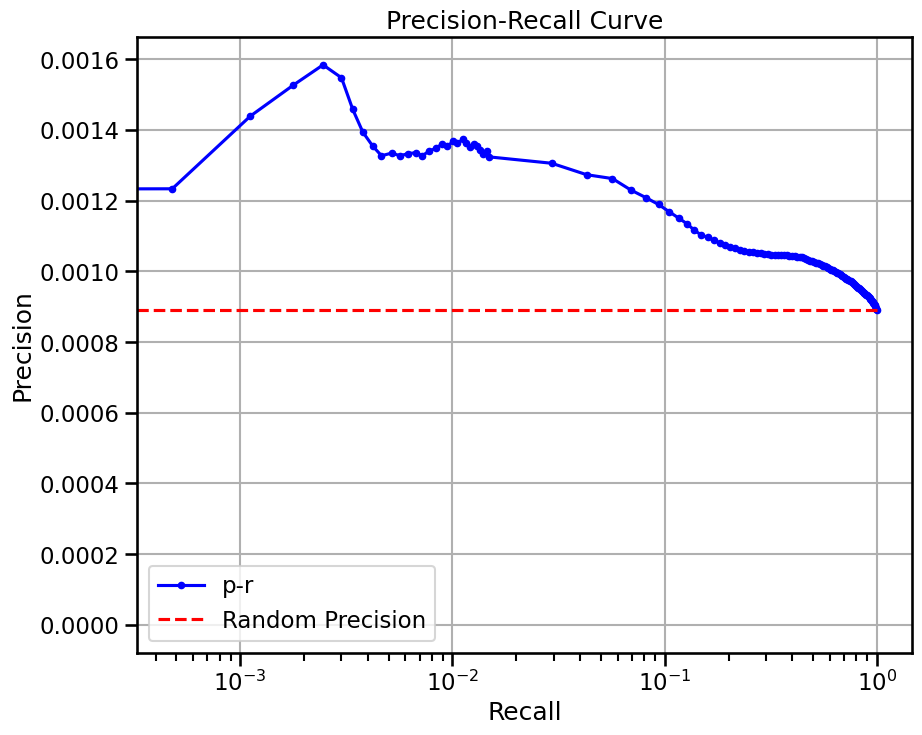

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:52,  2.51s/it]

  9%|▉         | 2/22 [00:03<00:36,  1.84s/it]

 14%|█▎        | 3/22 [00:05<00:33,  1.76s/it]

 18%|█▊        | 4/22 [00:07<00:30,  1.71s/it]

 23%|██▎       | 5/22 [00:08<00:28,  1.65s/it]

 27%|██▋       | 6/22 [00:10<00:25,  1.61s/it]

 32%|███▏      | 7/22 [00:11<00:23,  1.59s/it]

 36%|███▋      | 8/22 [00:13<00:21,  1.57s/it]

 41%|████      | 9/22 [00:14<00:20,  1.55s/it]

 45%|████▌     | 10/22 [00:16<00:18,  1.54s/it]

 50%|█████     | 11/22 [00:17<00:16,  1.54s/it]

 55%|█████▍    | 12/22 [00:19<00:15,  1.54s/it]

 59%|█████▉    | 13/22 [00:20<00:13,  1.53s/it]

 64%|██████▎   | 14/22 [00:22<00:12,  1.53s/it]

 68%|██████▊   | 15/22 [00:24<00:10,  1.53s/it]

 73%|███████▎  | 16/22 [00:25<00:09,  1.54s/it]

 77%|███████▋  | 17/22 [00:27<00:07,  1.55s/it]

 82%|████████▏ | 18/22 [00:28<00:06,  1.54s/it]

 86%|████████▋ | 19/22 [00:30<00:04,  1.52s/it]

 91%|█████████ | 20/22 [00:31<00:03,  1.50s/it]

 95%|█████████▌| 21/22 [00:33<00:01,  1.49s/it]

100%|██████████| 22/22 [00:34<00:00,  1.45s/it]

100%|██████████| 22/22 [00:34<00:00,  1.57s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


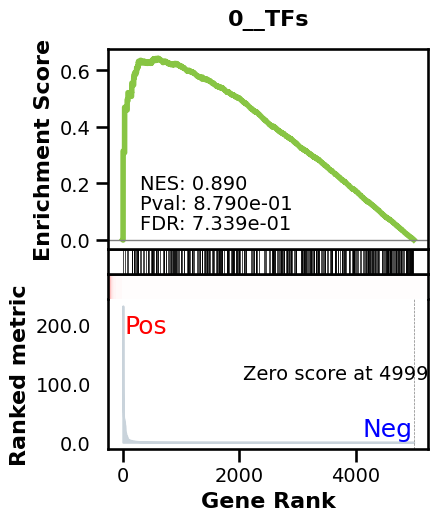

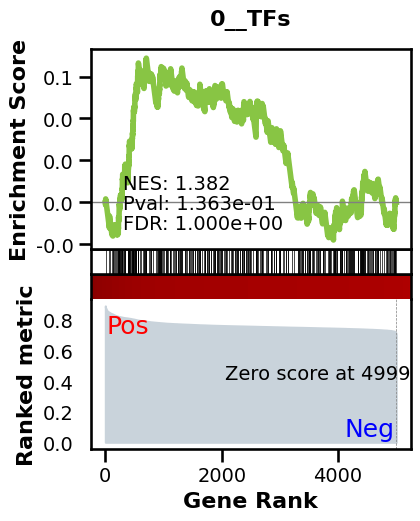

_________________________________________
TF specific enrichment


found some significant results for  22.916666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 48.84it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.10it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.32it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.27it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.13it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.19it/s]

 27%|██▋       | 35/128 [00:00<00:02, 46.24it/s]

 32%|███▏      | 41/128 [00:00<00:01, 49.54it/s]

 37%|███▋      | 47/128 [00:00<00:01, 52.14it/s]

 41%|████▏     | 53/128 [00:01<00:01, 53.90it/s]

 46%|████▌     | 59/128 [00:01<00:01, 54.73it/s]

 51%|█████     | 65/128 [00:01<00:01, 55.43it/s]

 55%|█████▌    | 71/128 [00:01<00:01, 55.77it/s]

 60%|██████    | 77/128 [00:01<00:00, 56.20it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 56.55it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 56.59it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 56.96it/s]

 79%|███████▉  | 101/128 [00:01<00:00, 56.90it/s]

 84%|████████▎ | 107/128 [00:01<00:00, 56.90it/s]

 88%|████████▊ | 113/128 [00:02<00:00, 57.18it/s]

 93%|█████████▎| 119/128 [00:02<00:00, 57.07it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 57.27it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.25it/s]

Average Precision (AP):  0.001523750665976051
Area Under Precision-Recall Curve (AUPRC):  0.00152182807740365


EPR: 1.1764091504742658


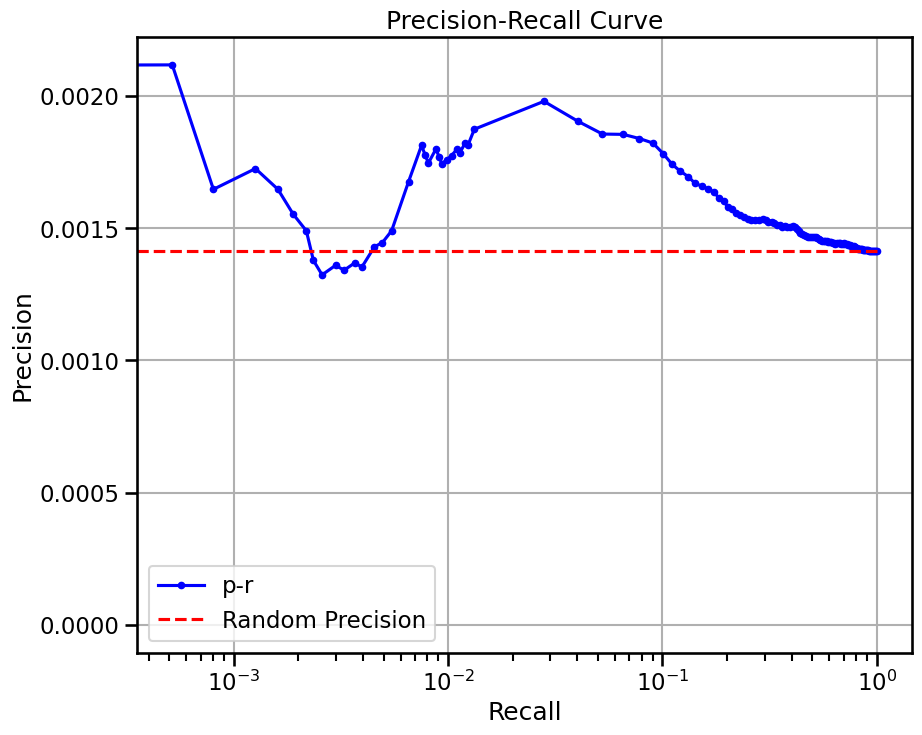

base enrichment


Top central genes: []


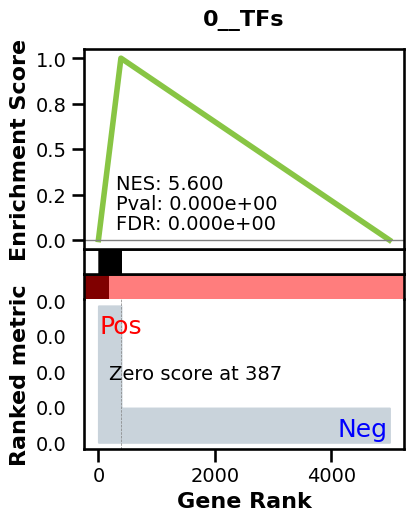

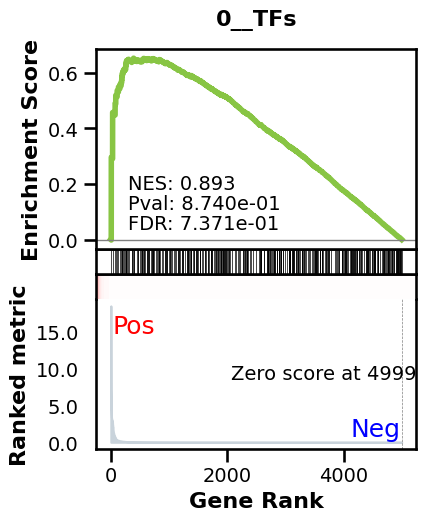

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.49it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.97it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.98it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.11it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.17it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.84it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.76it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.28it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.25it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.31it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.46it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.41it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.10it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.89it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.88it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.01it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.11it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.19it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.18it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.94it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.01it/s]

Average Precision (AP):  0.005632885394632145
Area Under Precision-Recall Curve (AUPRC):  0.005065184535349827
EPR: 9.123769079747344


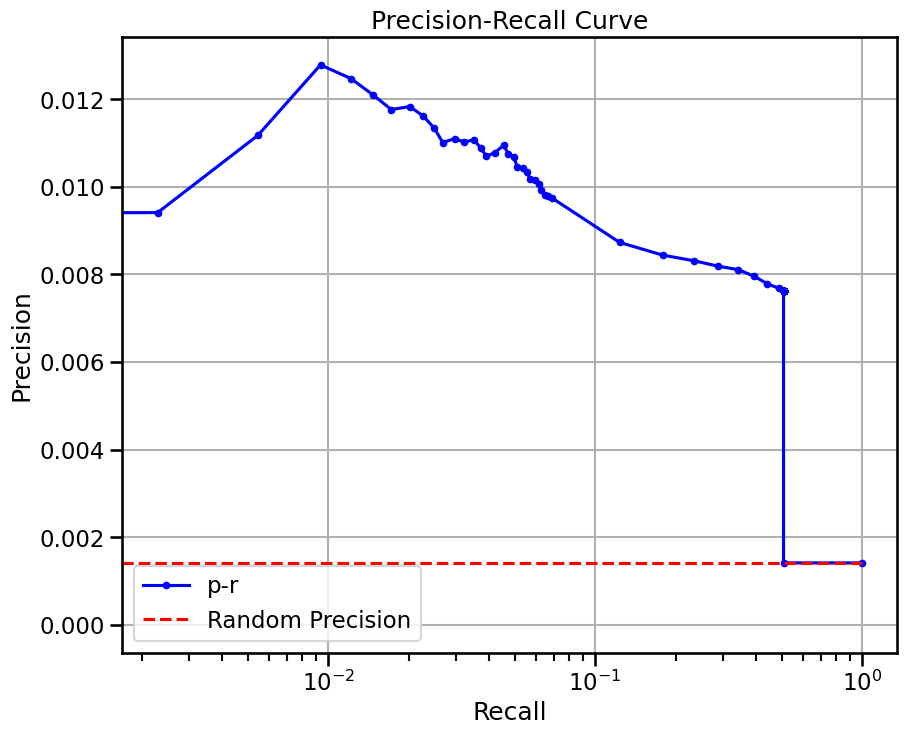

base enrichment


Top central genes: []
The DataFrame contains only the same values.


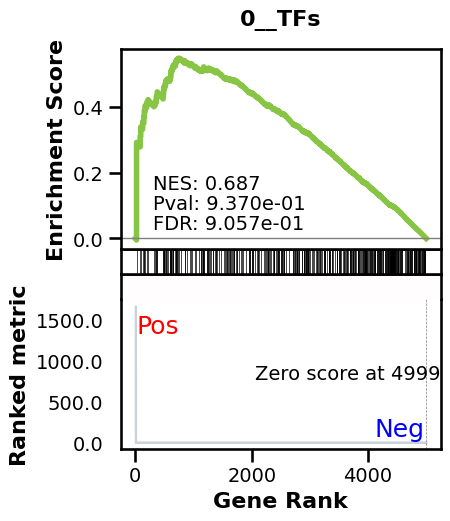

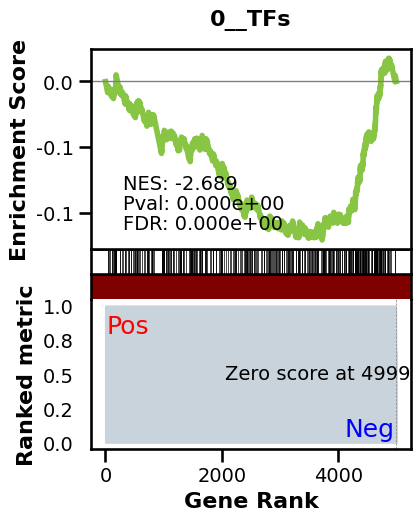

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.21it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.43it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.73it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.55it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.89it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.50it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.57it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.52it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.71it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.58it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.28it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.23it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.56it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.52it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.45it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.36it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.47it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.72it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.56it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.39it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.49it/s]

Average Precision (AP):  0.0018704413892922237
Area Under Precision-Recall Curve (AUPRC):  0.0018685022603467556
EPR: 1.7471423519160048


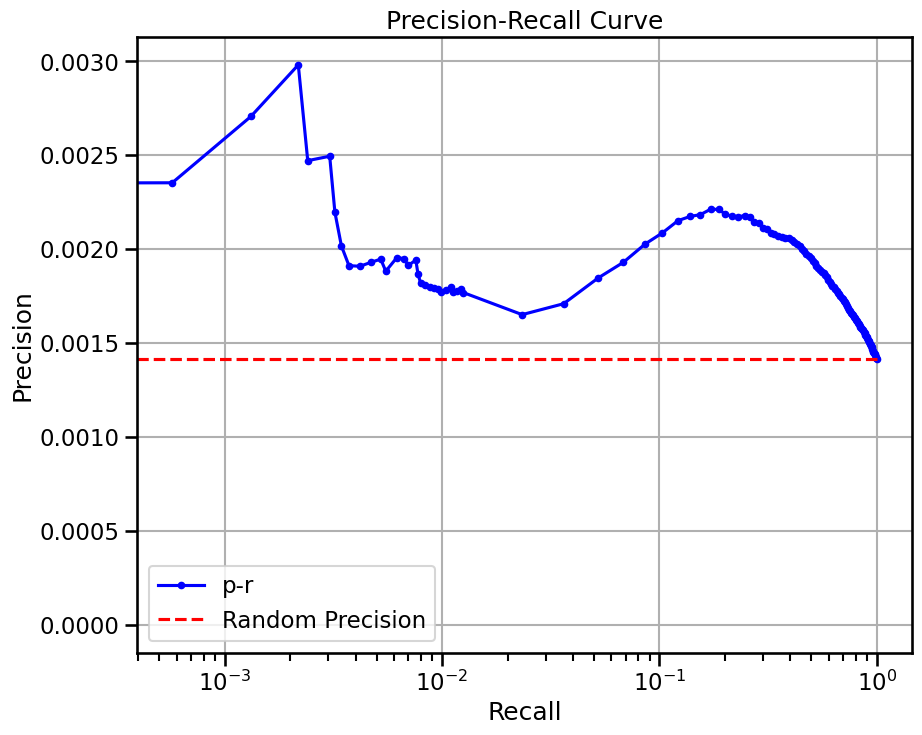

base enrichment


Top central genes: []


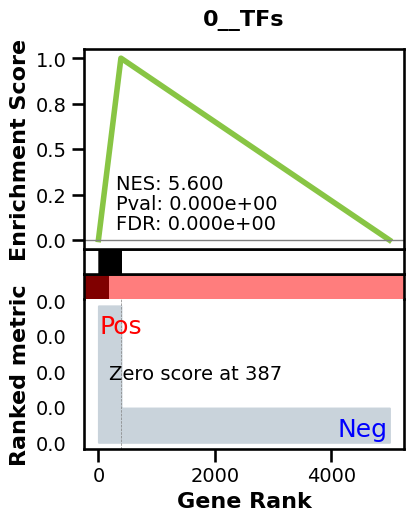

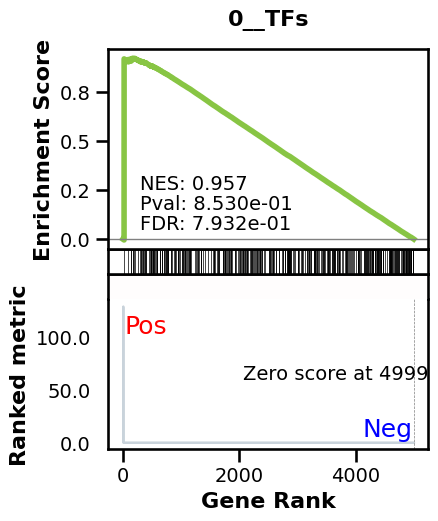

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.87it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.79it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.03it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.91it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.78it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.02it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.02it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.85it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.06it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.04it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.06it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.90it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.89it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.73it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.68it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.76it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.88it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.76it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.04it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.08it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.91it/s]

Average Precision (AP):  0.007888346985998947
Area Under Precision-Recall Curve (AUPRC):  0.0072502405470152385
EPR: 16.012405615818103


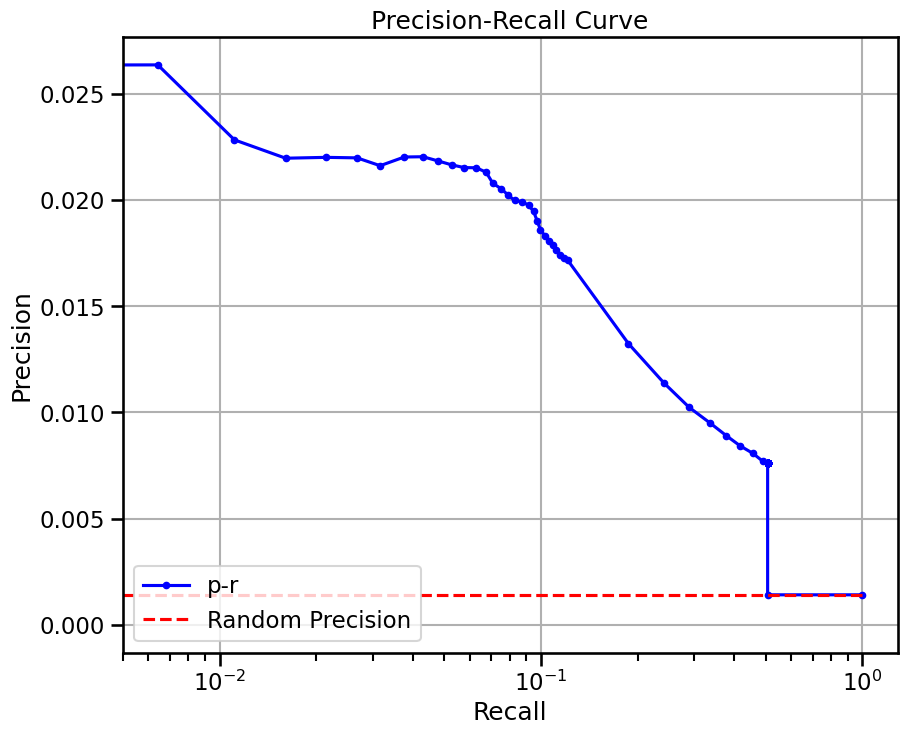

  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:02<00:02,  2.15s/it]

100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

avg link count: 487791396, sparsity: 1.0


base enrichment


too many genes for central computation


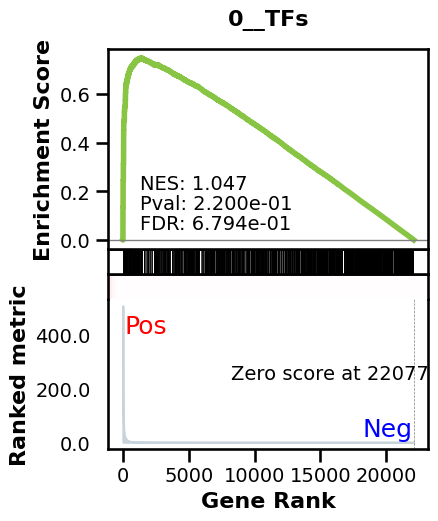

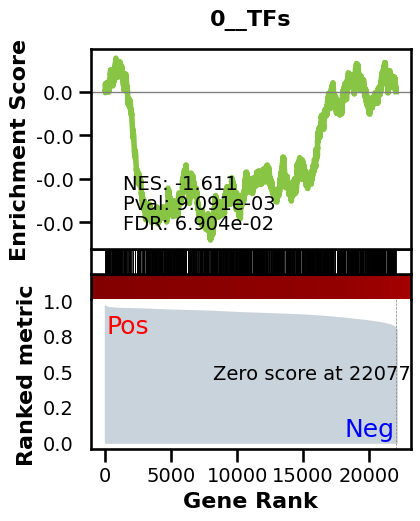

_________________________________________
TF specific enrichment


found some significant results for  61.81818181818182 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12002 genes
intersection pct: 0.5436180813479482


precision:  0.0009141049951653617 
recall:  1.0 
random precision: 0.0009141811642342031


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:27,  4.57it/s]

  2%|▏         | 2/128 [00:00<00:27,  4.56it/s]

  2%|▏         | 3/128 [00:00<00:27,  4.57it/s]

  3%|▎         | 4/128 [00:00<00:27,  4.57it/s]

  4%|▍         | 5/128 [00:01<00:26,  4.58it/s]

  5%|▍         | 6/128 [00:01<00:26,  4.58it/s]

  5%|▌         | 7/128 [00:01<00:26,  4.58it/s]

  6%|▋         | 8/128 [00:01<00:26,  4.58it/s]

  7%|▋         | 9/128 [00:01<00:25,  4.60it/s]

  8%|▊         | 10/128 [00:02<00:25,  4.58it/s]

  9%|▊         | 11/128 [00:02<00:25,  4.58it/s]

  9%|▉         | 12/128 [00:02<00:25,  4.59it/s]

 10%|█         | 13/128 [00:02<00:25,  4.59it/s]

 11%|█         | 14/128 [00:03<00:24,  4.58it/s]

 12%|█▏        | 15/128 [00:03<00:24,  4.58it/s]

 12%|█▎        | 16/128 [00:03<00:24,  4.58it/s]

 13%|█▎        | 17/128 [00:03<00:24,  4.58it/s]

 14%|█▍        | 18/128 [00:03<00:24,  4.58it/s]

 15%|█▍        | 19/128 [00:04<00:23,  4.58it/s]

 16%|█▌        | 20/128 [00:04<00:23,  4.59it/s]

 16%|█▋        | 21/128 [00:04<00:23,  4.59it/s]

 17%|█▋        | 22/128 [00:04<00:23,  4.58it/s]

 18%|█▊        | 23/128 [00:05<00:22,  4.58it/s]

 19%|█▉        | 24/128 [00:05<00:22,  4.58it/s]

 20%|█▉        | 25/128 [00:05<00:22,  4.58it/s]

 20%|██        | 26/128 [00:05<00:22,  4.58it/s]

 21%|██        | 27/128 [00:05<00:22,  4.56it/s]

 22%|██▏       | 28/128 [00:06<00:21,  4.57it/s]

 23%|██▎       | 29/128 [00:06<00:21,  4.56it/s]

 23%|██▎       | 30/128 [00:06<00:21,  4.55it/s]

 24%|██▍       | 31/128 [00:06<00:21,  4.53it/s]

 25%|██▌       | 32/128 [00:06<00:21,  4.53it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.51it/s]

 27%|██▋       | 34/128 [00:07<00:20,  4.52it/s]

 27%|██▋       | 35/128 [00:07<00:20,  4.51it/s]

 28%|██▊       | 36/128 [00:07<00:20,  4.52it/s]

 29%|██▉       | 37/128 [00:08<00:20,  4.52it/s]

 30%|██▉       | 38/128 [00:08<00:19,  4.52it/s]

 30%|███       | 39/128 [00:08<00:19,  4.52it/s]

 31%|███▏      | 40/128 [00:08<00:19,  4.53it/s]

 32%|███▏      | 41/128 [00:08<00:19,  4.52it/s]

 33%|███▎      | 42/128 [00:09<00:18,  4.53it/s]

 34%|███▎      | 43/128 [00:09<00:18,  4.53it/s]

 34%|███▍      | 44/128 [00:09<00:18,  4.52it/s]

 35%|███▌      | 45/128 [00:09<00:18,  4.52it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.52it/s]

 37%|███▋      | 47/128 [00:10<00:17,  4.52it/s]

 38%|███▊      | 48/128 [00:10<00:17,  4.52it/s]

 38%|███▊      | 49/128 [00:10<00:17,  4.53it/s]

 39%|███▉      | 50/128 [00:10<00:17,  4.53it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.52it/s]

 41%|████      | 52/128 [00:11<00:16,  4.50it/s]

 41%|████▏     | 53/128 [00:11<00:16,  4.51it/s]

 42%|████▏     | 54/128 [00:11<00:16,  4.50it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.48it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.49it/s]

 45%|████▍     | 57/128 [00:12<00:15,  4.49it/s]

 45%|████▌     | 58/128 [00:12<00:15,  4.50it/s]

 46%|████▌     | 59/128 [00:12<00:15,  4.49it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.50it/s]

 48%|████▊     | 61/128 [00:13<00:14,  4.49it/s]

 48%|████▊     | 62/128 [00:13<00:14,  4.51it/s]

 49%|████▉     | 63/128 [00:13<00:14,  4.52it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.52it/s]

 51%|█████     | 65/128 [00:14<00:13,  4.52it/s]

 52%|█████▏    | 66/128 [00:14<00:13,  4.53it/s]

 52%|█████▏    | 67/128 [00:14<00:13,  4.54it/s]

 53%|█████▎    | 68/128 [00:14<00:13,  4.53it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.53it/s]

 55%|█████▍    | 70/128 [00:15<00:12,  4.53it/s]

 55%|█████▌    | 71/128 [00:15<00:12,  4.53it/s]

 56%|█████▋    | 72/128 [00:15<00:12,  4.53it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.53it/s]

 58%|█████▊    | 74/128 [00:16<00:11,  4.53it/s]

 59%|█████▊    | 75/128 [00:16<00:11,  4.52it/s]

 59%|█████▉    | 76/128 [00:16<00:11,  4.54it/s]

 60%|██████    | 77/128 [00:16<00:11,  4.53it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.53it/s]

 62%|██████▏   | 79/128 [00:17<00:10,  4.53it/s]

 62%|██████▎   | 80/128 [00:17<00:10,  4.53it/s]

 63%|██████▎   | 81/128 [00:17<00:10,  4.53it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.53it/s]

 65%|██████▍   | 83/128 [00:18<00:09,  4.52it/s]

 66%|██████▌   | 84/128 [00:18<00:09,  4.53it/s]

 66%|██████▋   | 85/128 [00:18<00:09,  4.52it/s]

 67%|██████▋   | 86/128 [00:18<00:09,  4.52it/s]

 68%|██████▊   | 87/128 [00:19<00:09,  4.53it/s]

 69%|██████▉   | 88/128 [00:19<00:08,  4.52it/s]

 70%|██████▉   | 89/128 [00:19<00:08,  4.53it/s]

 70%|███████   | 90/128 [00:19<00:08,  4.52it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.53it/s]

 72%|███████▏  | 92/128 [00:20<00:07,  4.52it/s]

 73%|███████▎  | 93/128 [00:20<00:07,  4.53it/s]

 73%|███████▎  | 94/128 [00:20<00:07,  4.52it/s]

 74%|███████▍  | 95/128 [00:20<00:07,  4.53it/s]

 75%|███████▌  | 96/128 [00:21<00:07,  4.53it/s]

 76%|███████▌  | 97/128 [00:21<00:06,  4.53it/s]

 77%|███████▋  | 98/128 [00:21<00:06,  4.52it/s]

 77%|███████▋  | 99/128 [00:21<00:06,  4.53it/s]

 78%|███████▊  | 100/128 [00:22<00:06,  4.53it/s]

 79%|███████▉  | 101/128 [00:22<00:05,  4.53it/s]

 80%|███████▉  | 102/128 [00:22<00:05,  4.52it/s]

 80%|████████  | 103/128 [00:22<00:05,  4.54it/s]

 81%|████████▏ | 104/128 [00:22<00:05,  4.53it/s]

 82%|████████▏ | 105/128 [00:23<00:05,  4.53it/s]

 83%|████████▎ | 106/128 [00:23<00:04,  4.53it/s]

 84%|████████▎ | 107/128 [00:23<00:04,  4.53it/s]

 84%|████████▍ | 108/128 [00:23<00:04,  4.53it/s]

 85%|████████▌ | 109/128 [00:24<00:04,  4.53it/s]

 86%|████████▌ | 110/128 [00:24<00:03,  4.52it/s]

 87%|████████▋ | 111/128 [00:24<00:03,  4.52it/s]

 88%|████████▊ | 112/128 [00:24<00:03,  4.51it/s]

 88%|████████▊ | 113/128 [00:24<00:03,  4.53it/s]

 89%|████████▉ | 114/128 [00:25<00:03,  4.52it/s]

 90%|████████▉ | 115/128 [00:25<00:02,  4.52it/s]

 91%|█████████ | 116/128 [00:25<00:02,  4.52it/s]

 91%|█████████▏| 117/128 [00:25<00:02,  4.51it/s]

 92%|█████████▏| 118/128 [00:26<00:02,  4.52it/s]

 93%|█████████▎| 119/128 [00:26<00:01,  4.52it/s]

 94%|█████████▍| 120/128 [00:26<00:01,  4.54it/s]

 95%|█████████▍| 121/128 [00:26<00:01,  4.40it/s]

 95%|█████████▌| 122/128 [00:26<00:01,  4.43it/s]

 96%|█████████▌| 123/128 [00:27<00:01,  4.47it/s]

 97%|█████████▋| 124/128 [00:27<00:00,  4.48it/s]

 98%|█████████▊| 125/128 [00:27<00:00,  4.48it/s]

 98%|█████████▊| 126/128 [00:27<00:00,  4.50it/s]

 99%|█████████▉| 127/128 [00:28<00:00,  4.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:28<00:00,  4.51it/s]

100%|██████████| 128/128 [00:28<00:00,  4.53it/s]

Average Precision (AP):  0.0010811227064379582
Area Under Precision-Recall Curve (AUPRC):  0.0010804399720855122


In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [ ]:
metrics

In [ ]:
True
True
True
True
True
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
True
True
True
False
True
True
False
False
False
False
False
False
False
True
False
True

In [ ]:
print('new')

In [ ]:
import pandas as pd

In [ ]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df